# SysML v2 Test Suite

This can notebook can be cleared using menu `Edit --> Clear All Outputs` and then all cells can be
run using menu `Run --> Run All Cells`.

**WARNING**: This file is generated, all modifications here will be ignored.


## File: ../../sysml/src/examples/Variability Examples/VehicleVariabilityModel.sysml

In [1]:
package VehicleVariabilityModel {

	package DesignModel {
		import PartDefinitions::*;
		import PartsTree::*;
		import ActionDefinitions::*;
		import ActionTree::*;
	
		package PartDefinitions {
			part def Vehicle;
			
		    attribute def Diameter;
		    part def Cylinder {
		        attribute diameter : Diameter[1];
		    }
		
		    part def Engine;
		    part def Transmission;
		    part def Sunroof;
		
		    port def AutoPort;
	    }
	    
	    package PartsTree {
	    	part vehicle : Vehicle {
	    		part engine : Engine[1];
	    		part transmission : Transmission[1];
	    		part sunroof : Sunroof[0..1];
	    	}
	    	
		    part engine : Engine {
		        port autoPort : AutoPort;
		        part cylinder : Cylinder[2..*];
		    }
		    
		    part '4cylEngine' :> engine {
		    	part :>> cylinder[4];
		    }
		    
		    part '6cylEngine' :> engine {
		    	part :>> cylinder[6];
		    }
		
			part transmission : Transmission;
		    part manualTransmission :> transmission;
		    part automaticTransmission :> transmission;
	    }
	
		package ActionDefinitions {   
		    action def GenerateTorque;
		    action def AmplifyTorque;
		    action def ProvidePower;
	    }
	    
	    package ActionTree {    
		    action generateTorque4Cyl : GenerateTorque;
		    action generateTorque6Cyl : GenerateTorque;
		    
		    action amplifyTorqueManual : AmplifyTorque;
		    action amplifyTorqueAutomatic : AmplifyTorque;
	    }	
	}
		
	package '150% Model' {
		import DesignModel::*;
	
		package PartsTree {
		
		    // Variation point definitions
		
		    variation attribute def DiameterChoices :> Diameter {
		    	variant attribute diameterSmall;
		    	variant attribute diameterLarge;
		    }
		
		    variation part def EngineChoices :> Engine {
		        variant '4cylEngine';
		        variant '6cylEngine' {
		        	variation port :>> autoPort {
		        		variant port autoPort1;
		        		variant port autoPort2;
		        	}
		        	
		        	part :>> cylinder {
		        		attribute :>> diameter : DiameterChoices;
		        	}
		        	
		          	assert constraint {
		            	(autoPort == autoPort::autoPort1 & cylinder::diameter == cylinder::diameter::diameterSmall) ^
		             	(autoPort == autoPort::autoPort2 & cylinder::diameter == cylinder::diameter::diameterLarge)
		        	}
		        }
		    }
		
		    // Part superset model
		    
		    abstract part vehicleFamily :> vehicle {
		    	// Variation point usage
		        part :>> engine : EngineChoices[1];
		        
		        // Variation point with embedded variant definitions
		        variation part :>> transmission : Transmission[1] {
		        	variant manualTransmission;
		        	variant automaticTransmission;
		        }
		        
		        assert constraint {
		            (engine == '4cylEngine' & transmission == transmission::manualTransmission) ^
		            (engine == '6cylEngine' & transmission == transmission::automaticTransmission)
		        }
		        
		        // Variation point on variant multiplicity (inherited multiplicity is [0..1]) 
		        variation part :>> sunroof {
		        	variant part withSunroof[1];
		        	variant part withoutSunroof[0];
		        }
		        
		        perform ActionTree::providePowerFamily;
		    }
		}
		
		package ActionTree {
		
		    // Action superset Model
		    
		    action providePowerFamily : ProvidePower {
		        variation action generateTorque : GenerateTorque {
		        	variant generateTorque4Cyl;
		        	variant generateTorque6Cyl;
		        }
		        
		        variation action amplifyTorque : AmplifyTorque {
		        	variant amplifyTorqueManual;
		        	variant amplifyTorqueAutomatic;
		        }
		        
			    assert constraint {
			        (generateTorque == generateTorque::generateTorque4Cyl & 
			        	amplifyTorque == amplifyTorque::amplifyTorqueManual
			        ) ^
			        (generateTorque == generateTorque::generateTorque6Cyl & 
			        	amplifyTorque == amplifyTorque::amplifyTorqueAutomatic
			        )
			    }		   
		    }		    
		}
	}
	
	package '100% Model' {
		import '150% Model'::*;
		
		// Vehicle instance model
		
	    part vehicle4Cyl :> PartsTree::vehicleFamily {
	        part :>> engine = engine::'4cylEngine';
	        part :>> transmission = transmission::manualTransmission;
	        part :>> sunroof = sunroof::withoutSunroof;
	        
	        perform action :>> providePowerFamily {
	            action :>> generateTorque = generateTorque::generateTorque4Cyl;
	            action :>> amplifyTorque = amplifyTorque::amplifyTorqueManual;
	        }
	    }
	}
}

Package VehicleVariabilityModel (b5596b0e-34a1-4815-95a9-26c8e3915ce5)


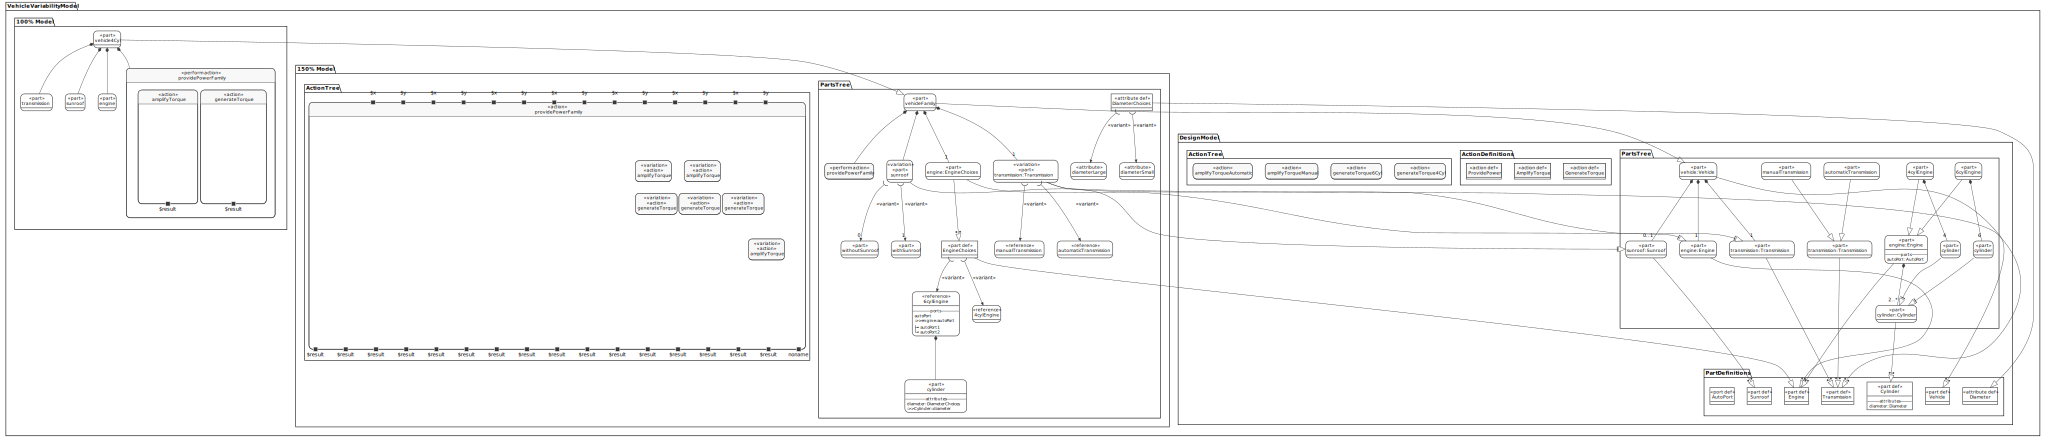

In [2]:
%viz --style="COMPTREE" --view="Default" "VehicleVariabilityModel"

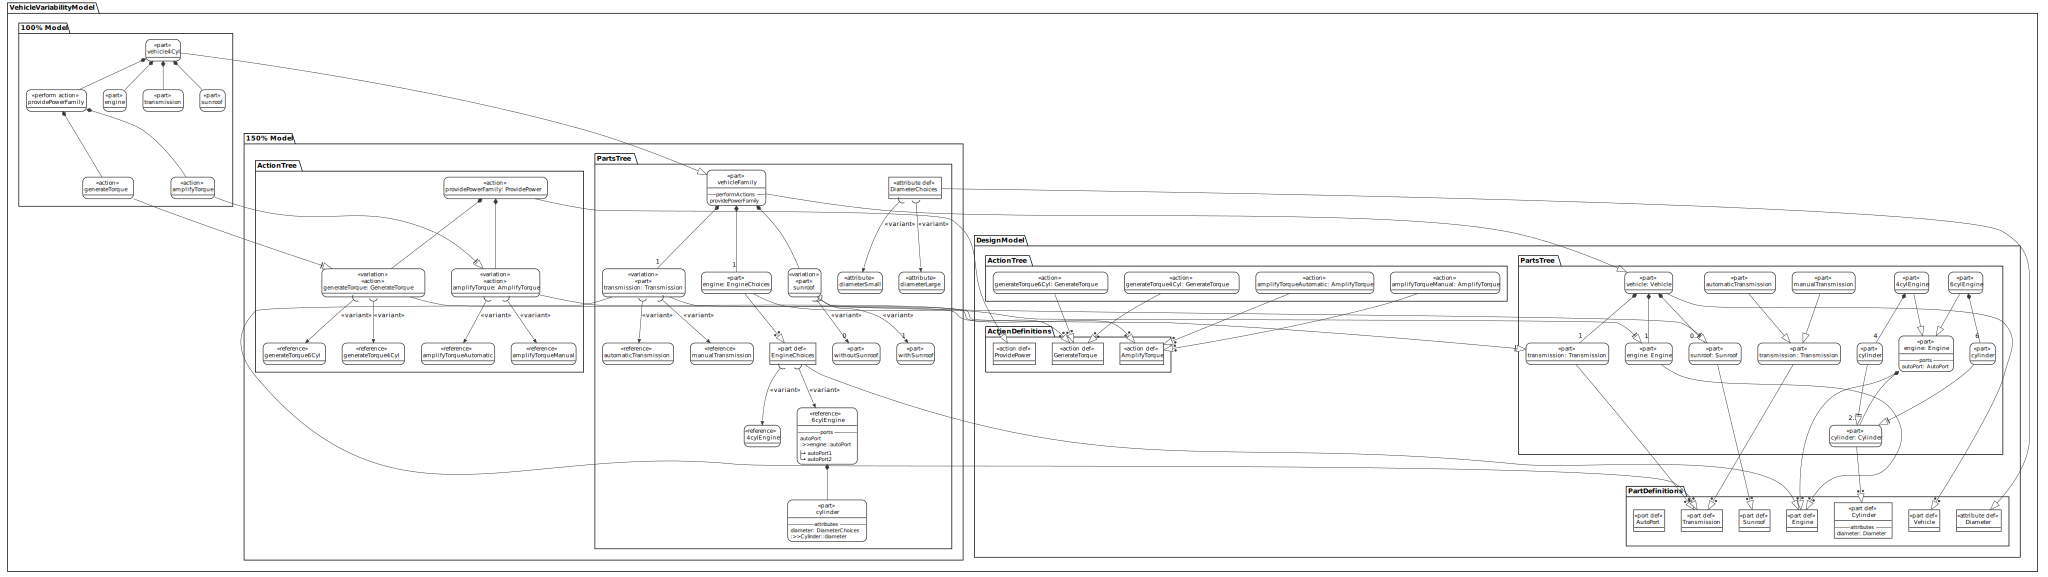

In [3]:
%viz --style="COMPTREE" --view="Tree" "VehicleVariabilityModel"

In [4]:
%viz --style="COMPTREE" --view="State" "VehicleVariabilityModel"

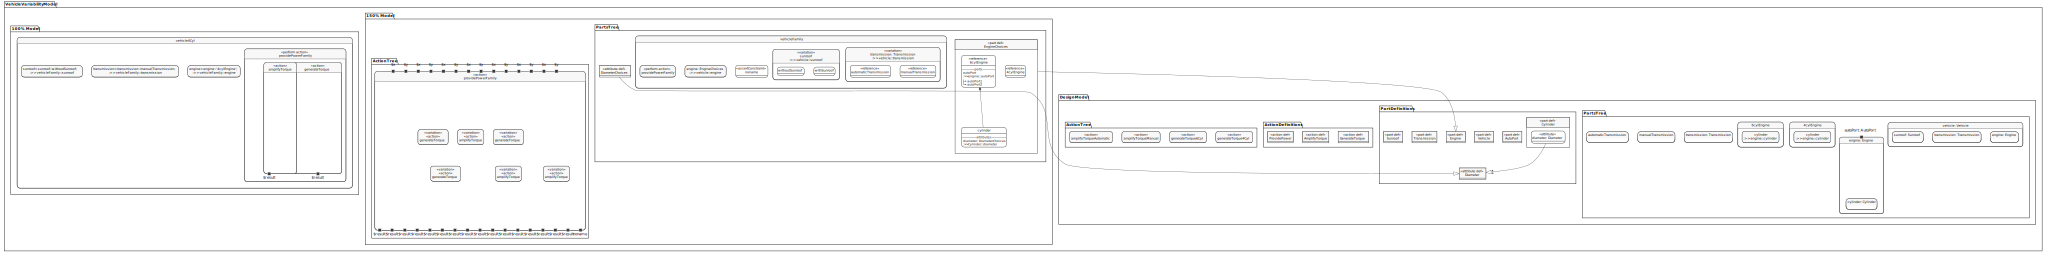

In [5]:
%viz --style="COMPTREE" --view="Interconnection" "VehicleVariabilityModel"

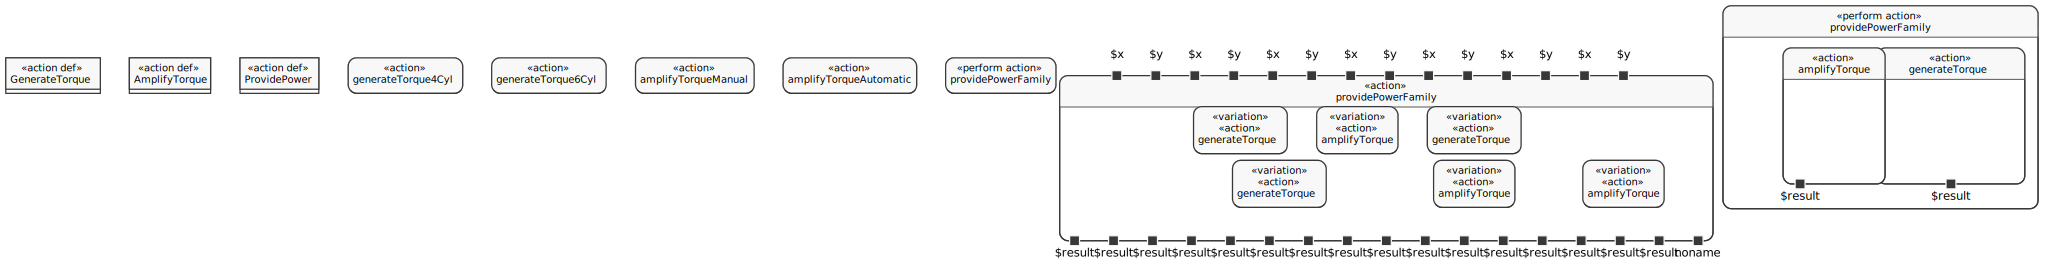

In [6]:
%viz --style="COMPTREE" --view="Action" "VehicleVariabilityModel"

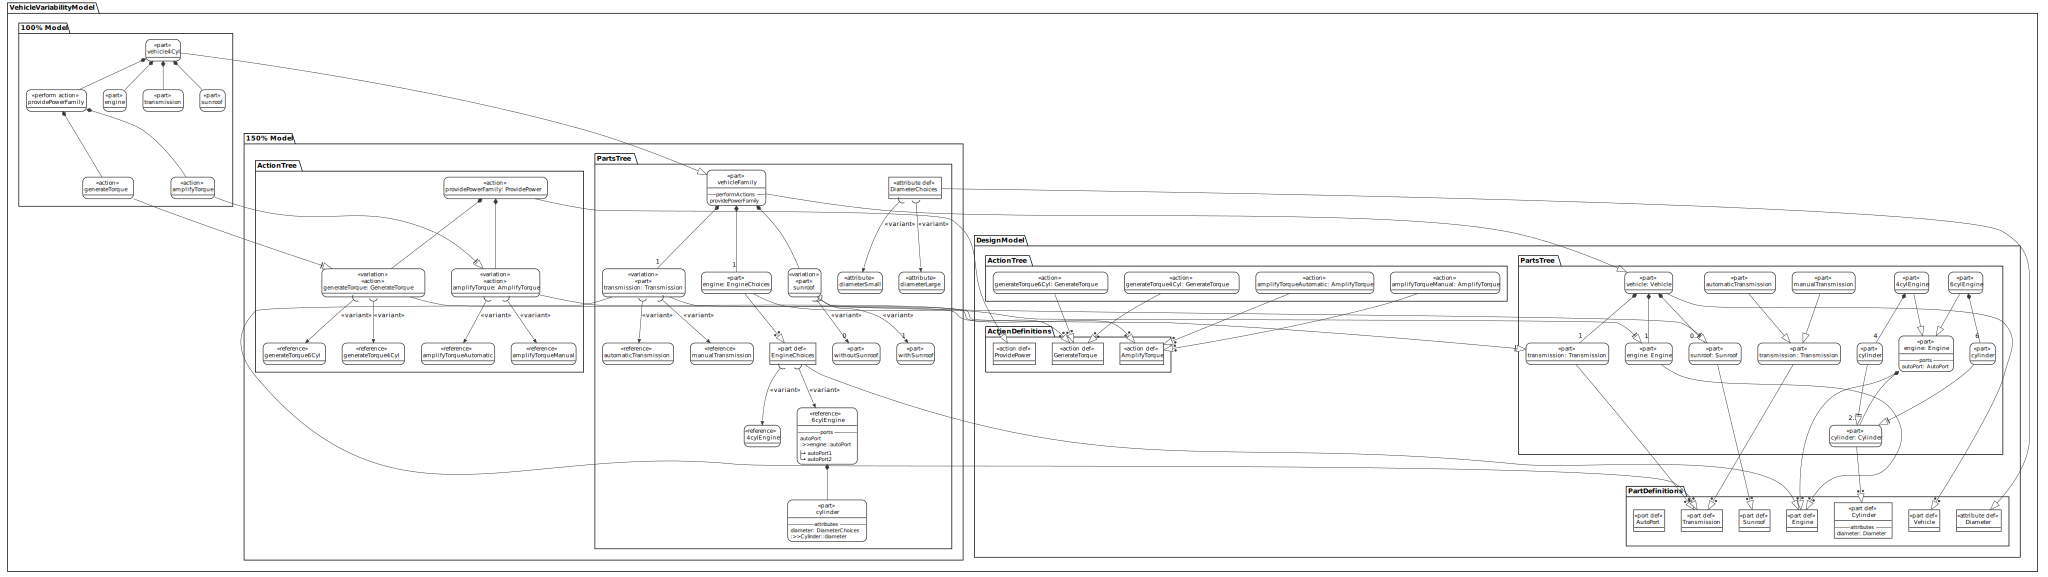

In [7]:
%viz --style="COMPTREE" --view="Sequence" "VehicleVariabilityModel"

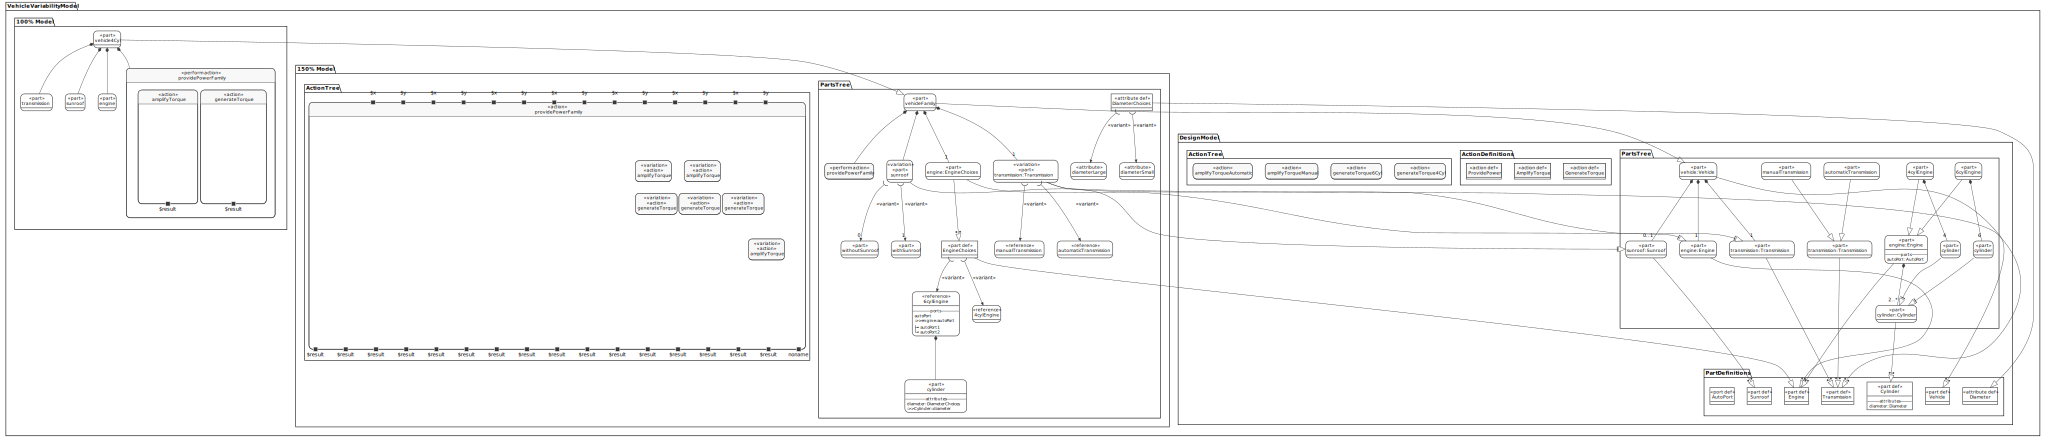

In [8]:
%viz --style="COMPTREE" --view="MIXED" "VehicleVariabilityModel"

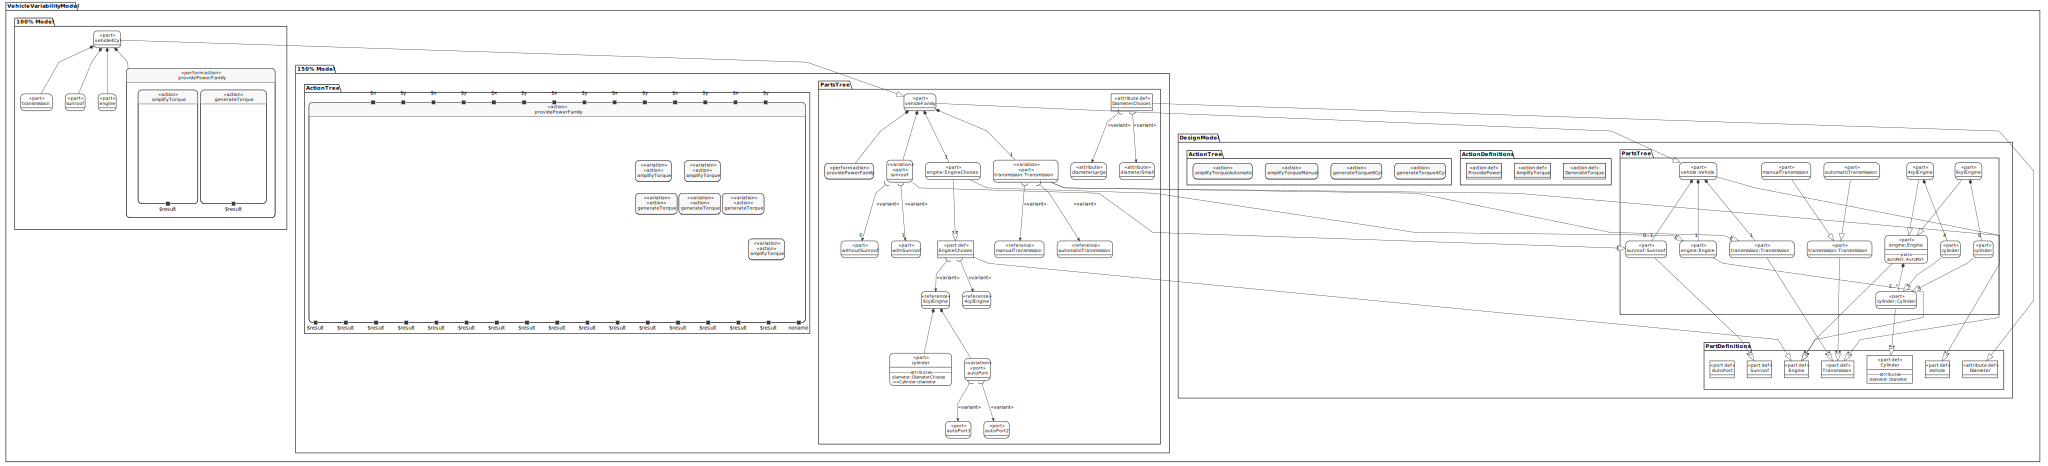

In [9]:
%viz --style="POLYLINE" --view="Default" "VehicleVariabilityModel"

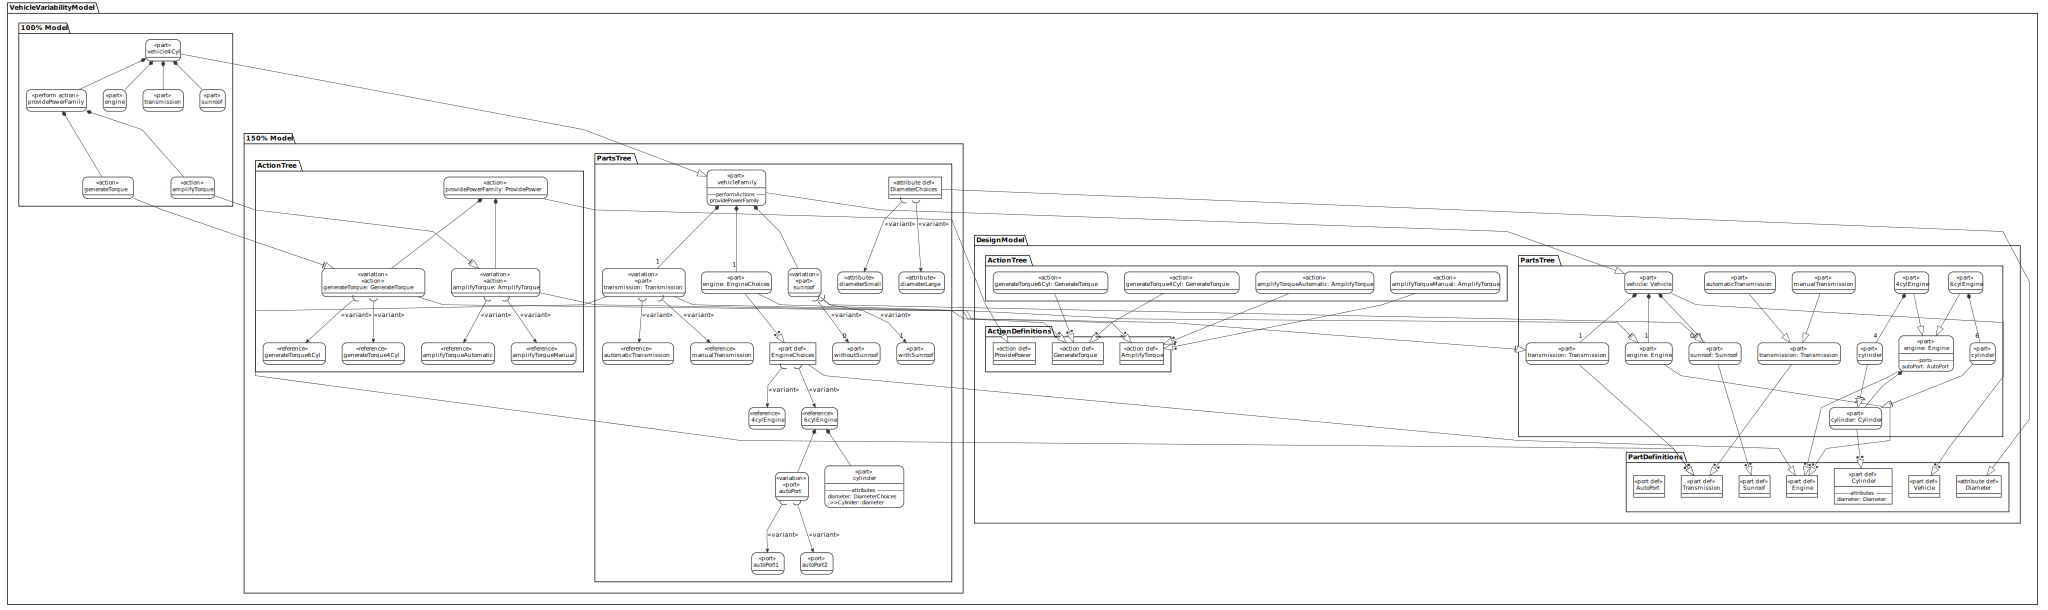

In [10]:
%viz --style="POLYLINE" --view="Tree" "VehicleVariabilityModel"

In [11]:
%viz --style="POLYLINE" --view="State" "VehicleVariabilityModel"

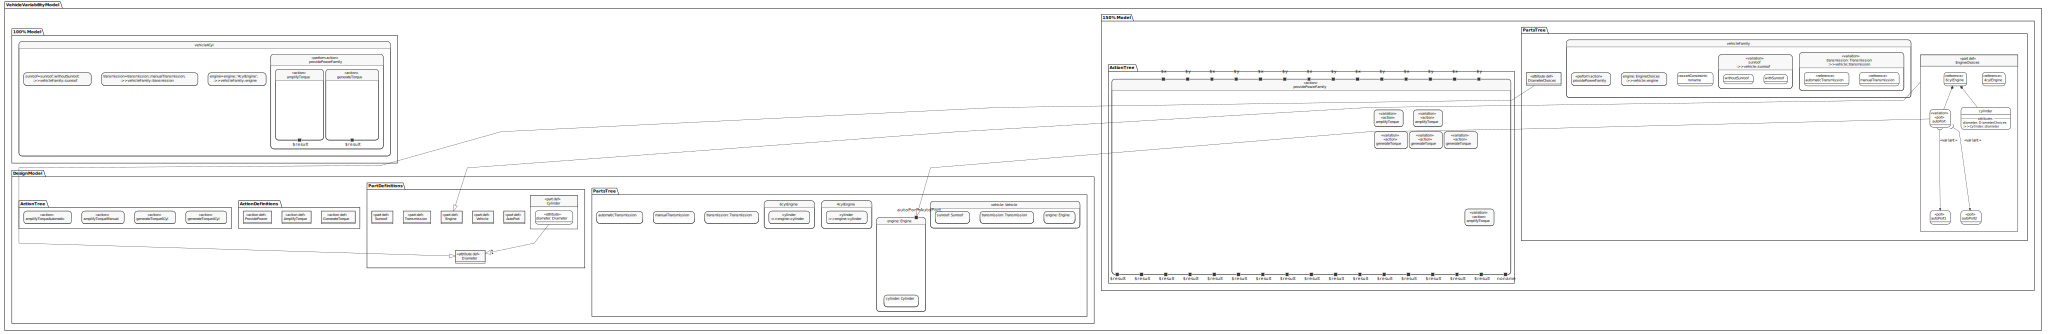

In [12]:
%viz --style="POLYLINE" --view="Interconnection" "VehicleVariabilityModel"

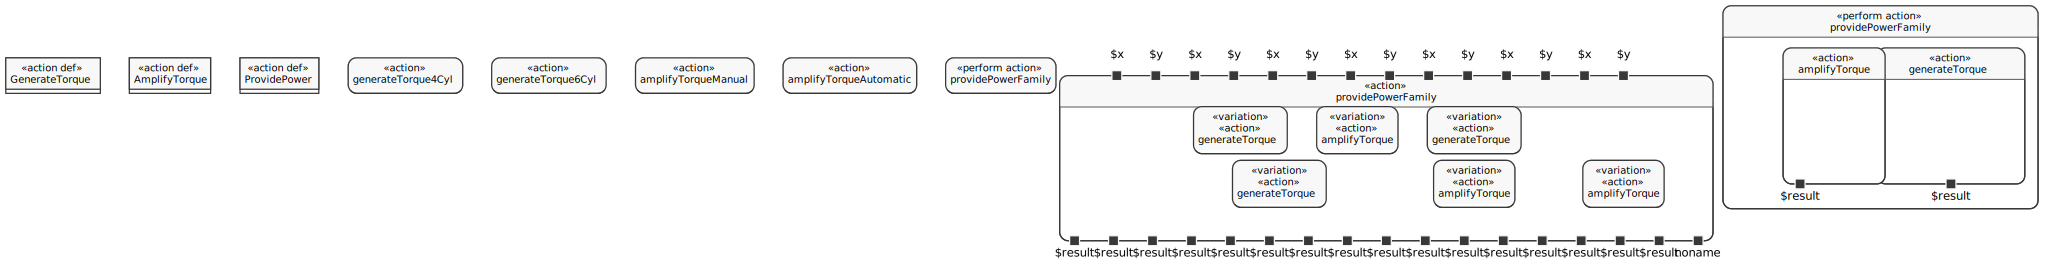

In [13]:
%viz --style="POLYLINE" --view="Action" "VehicleVariabilityModel"

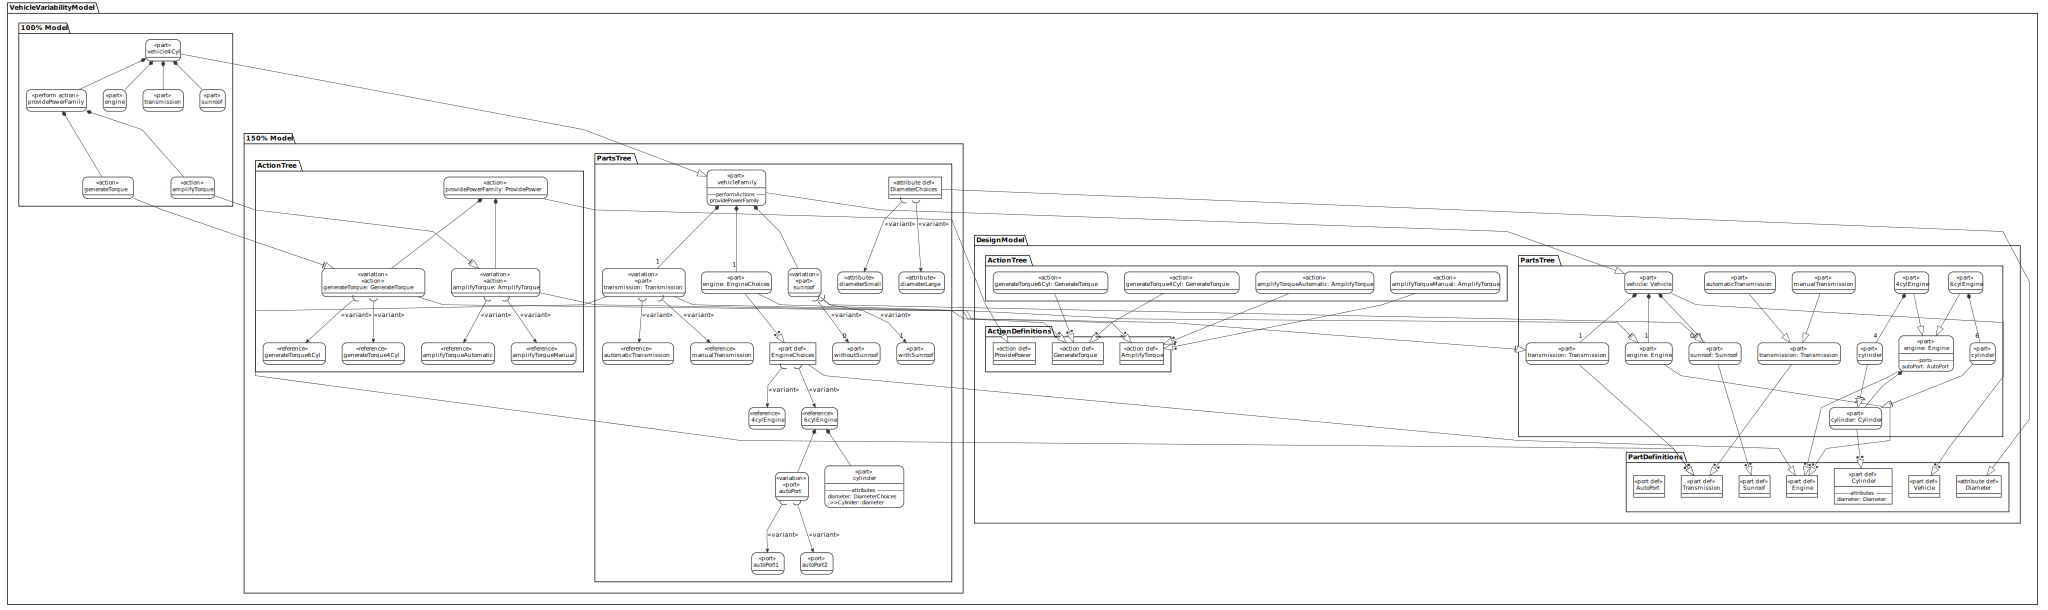

In [14]:
%viz --style="POLYLINE" --view="Sequence" "VehicleVariabilityModel"

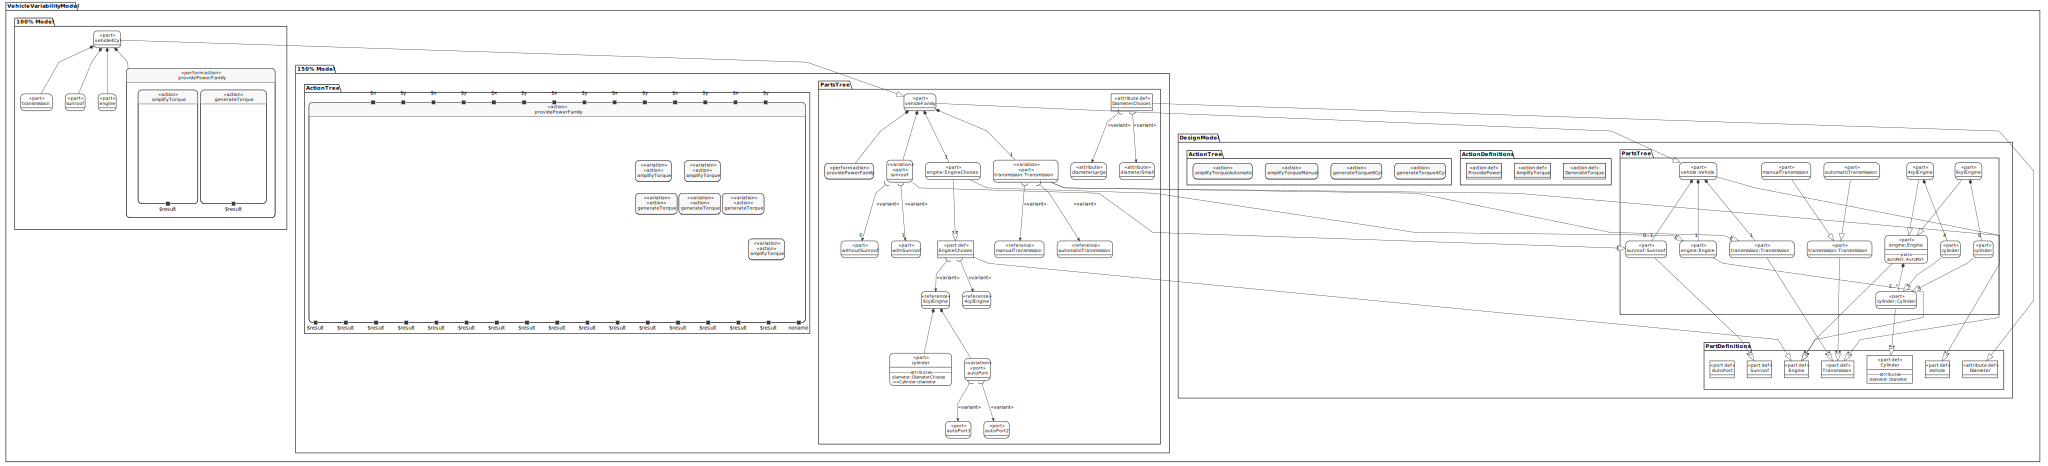

In [15]:
%viz --style="POLYLINE" --view="MIXED" "VehicleVariabilityModel"

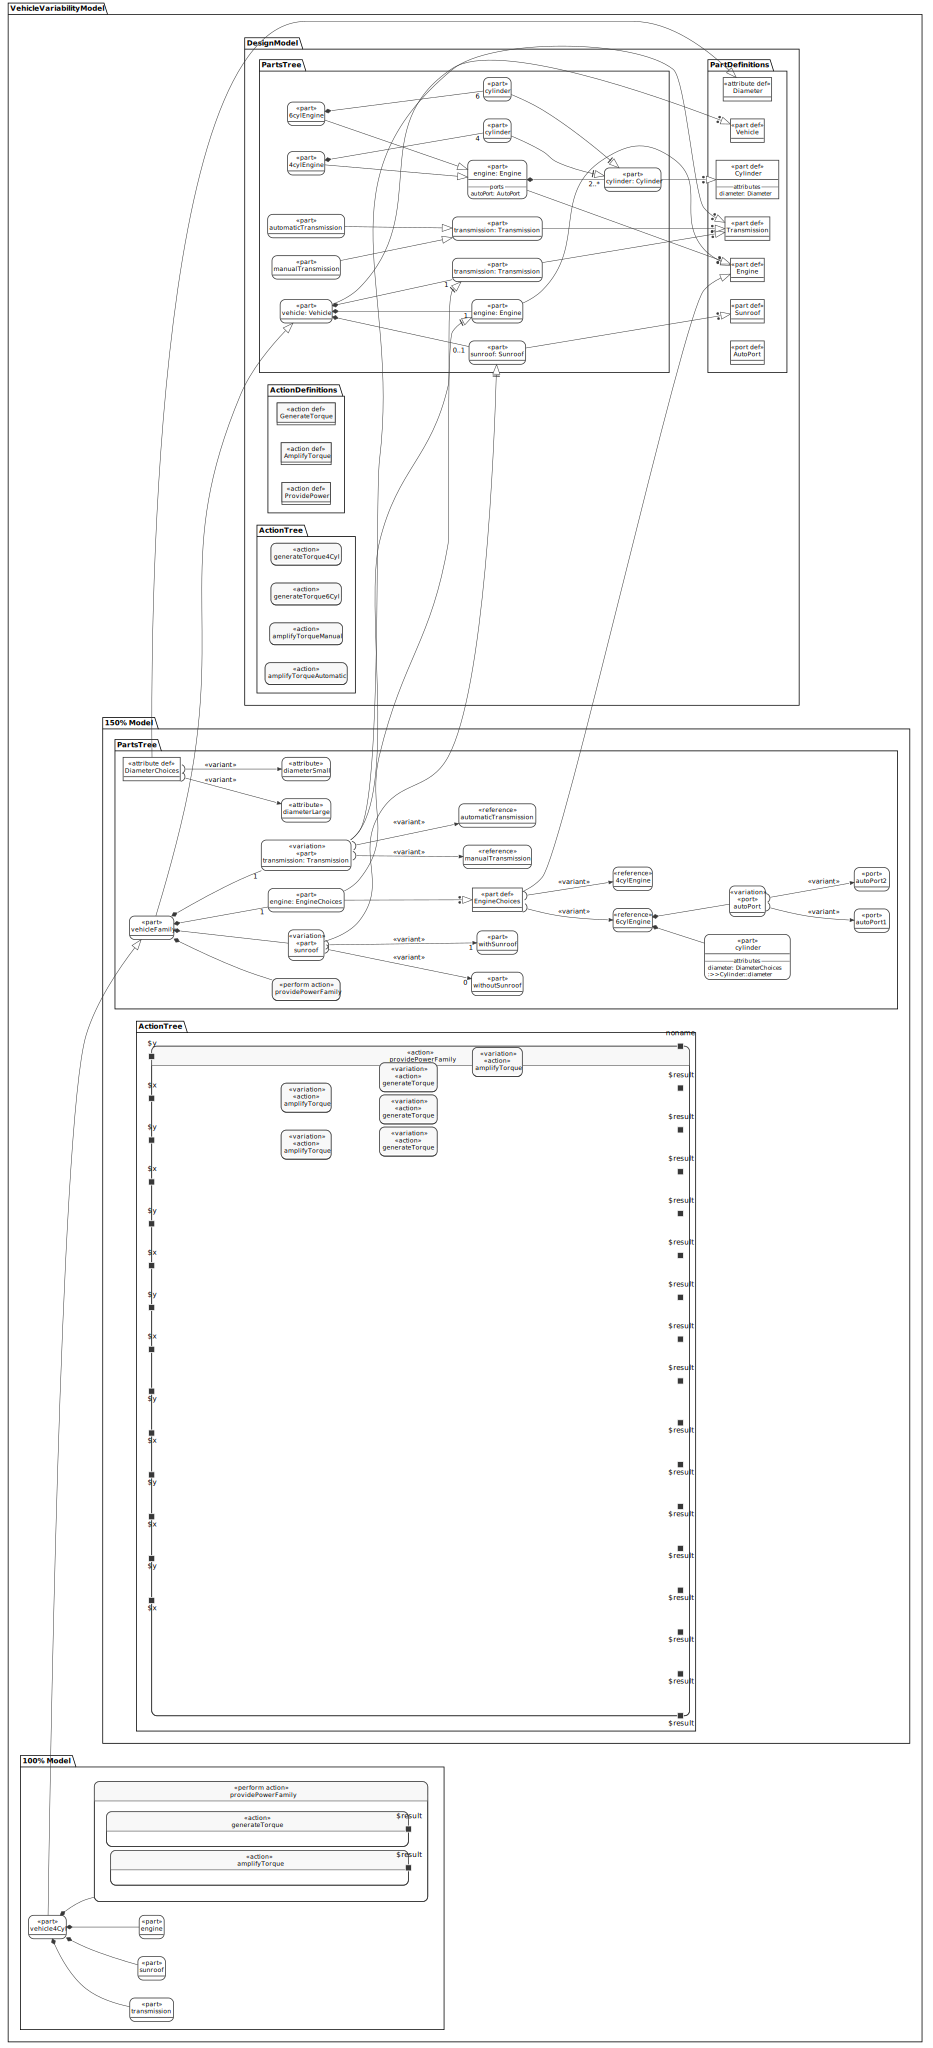

In [16]:
%viz --style="LR" --view="Default" "VehicleVariabilityModel"

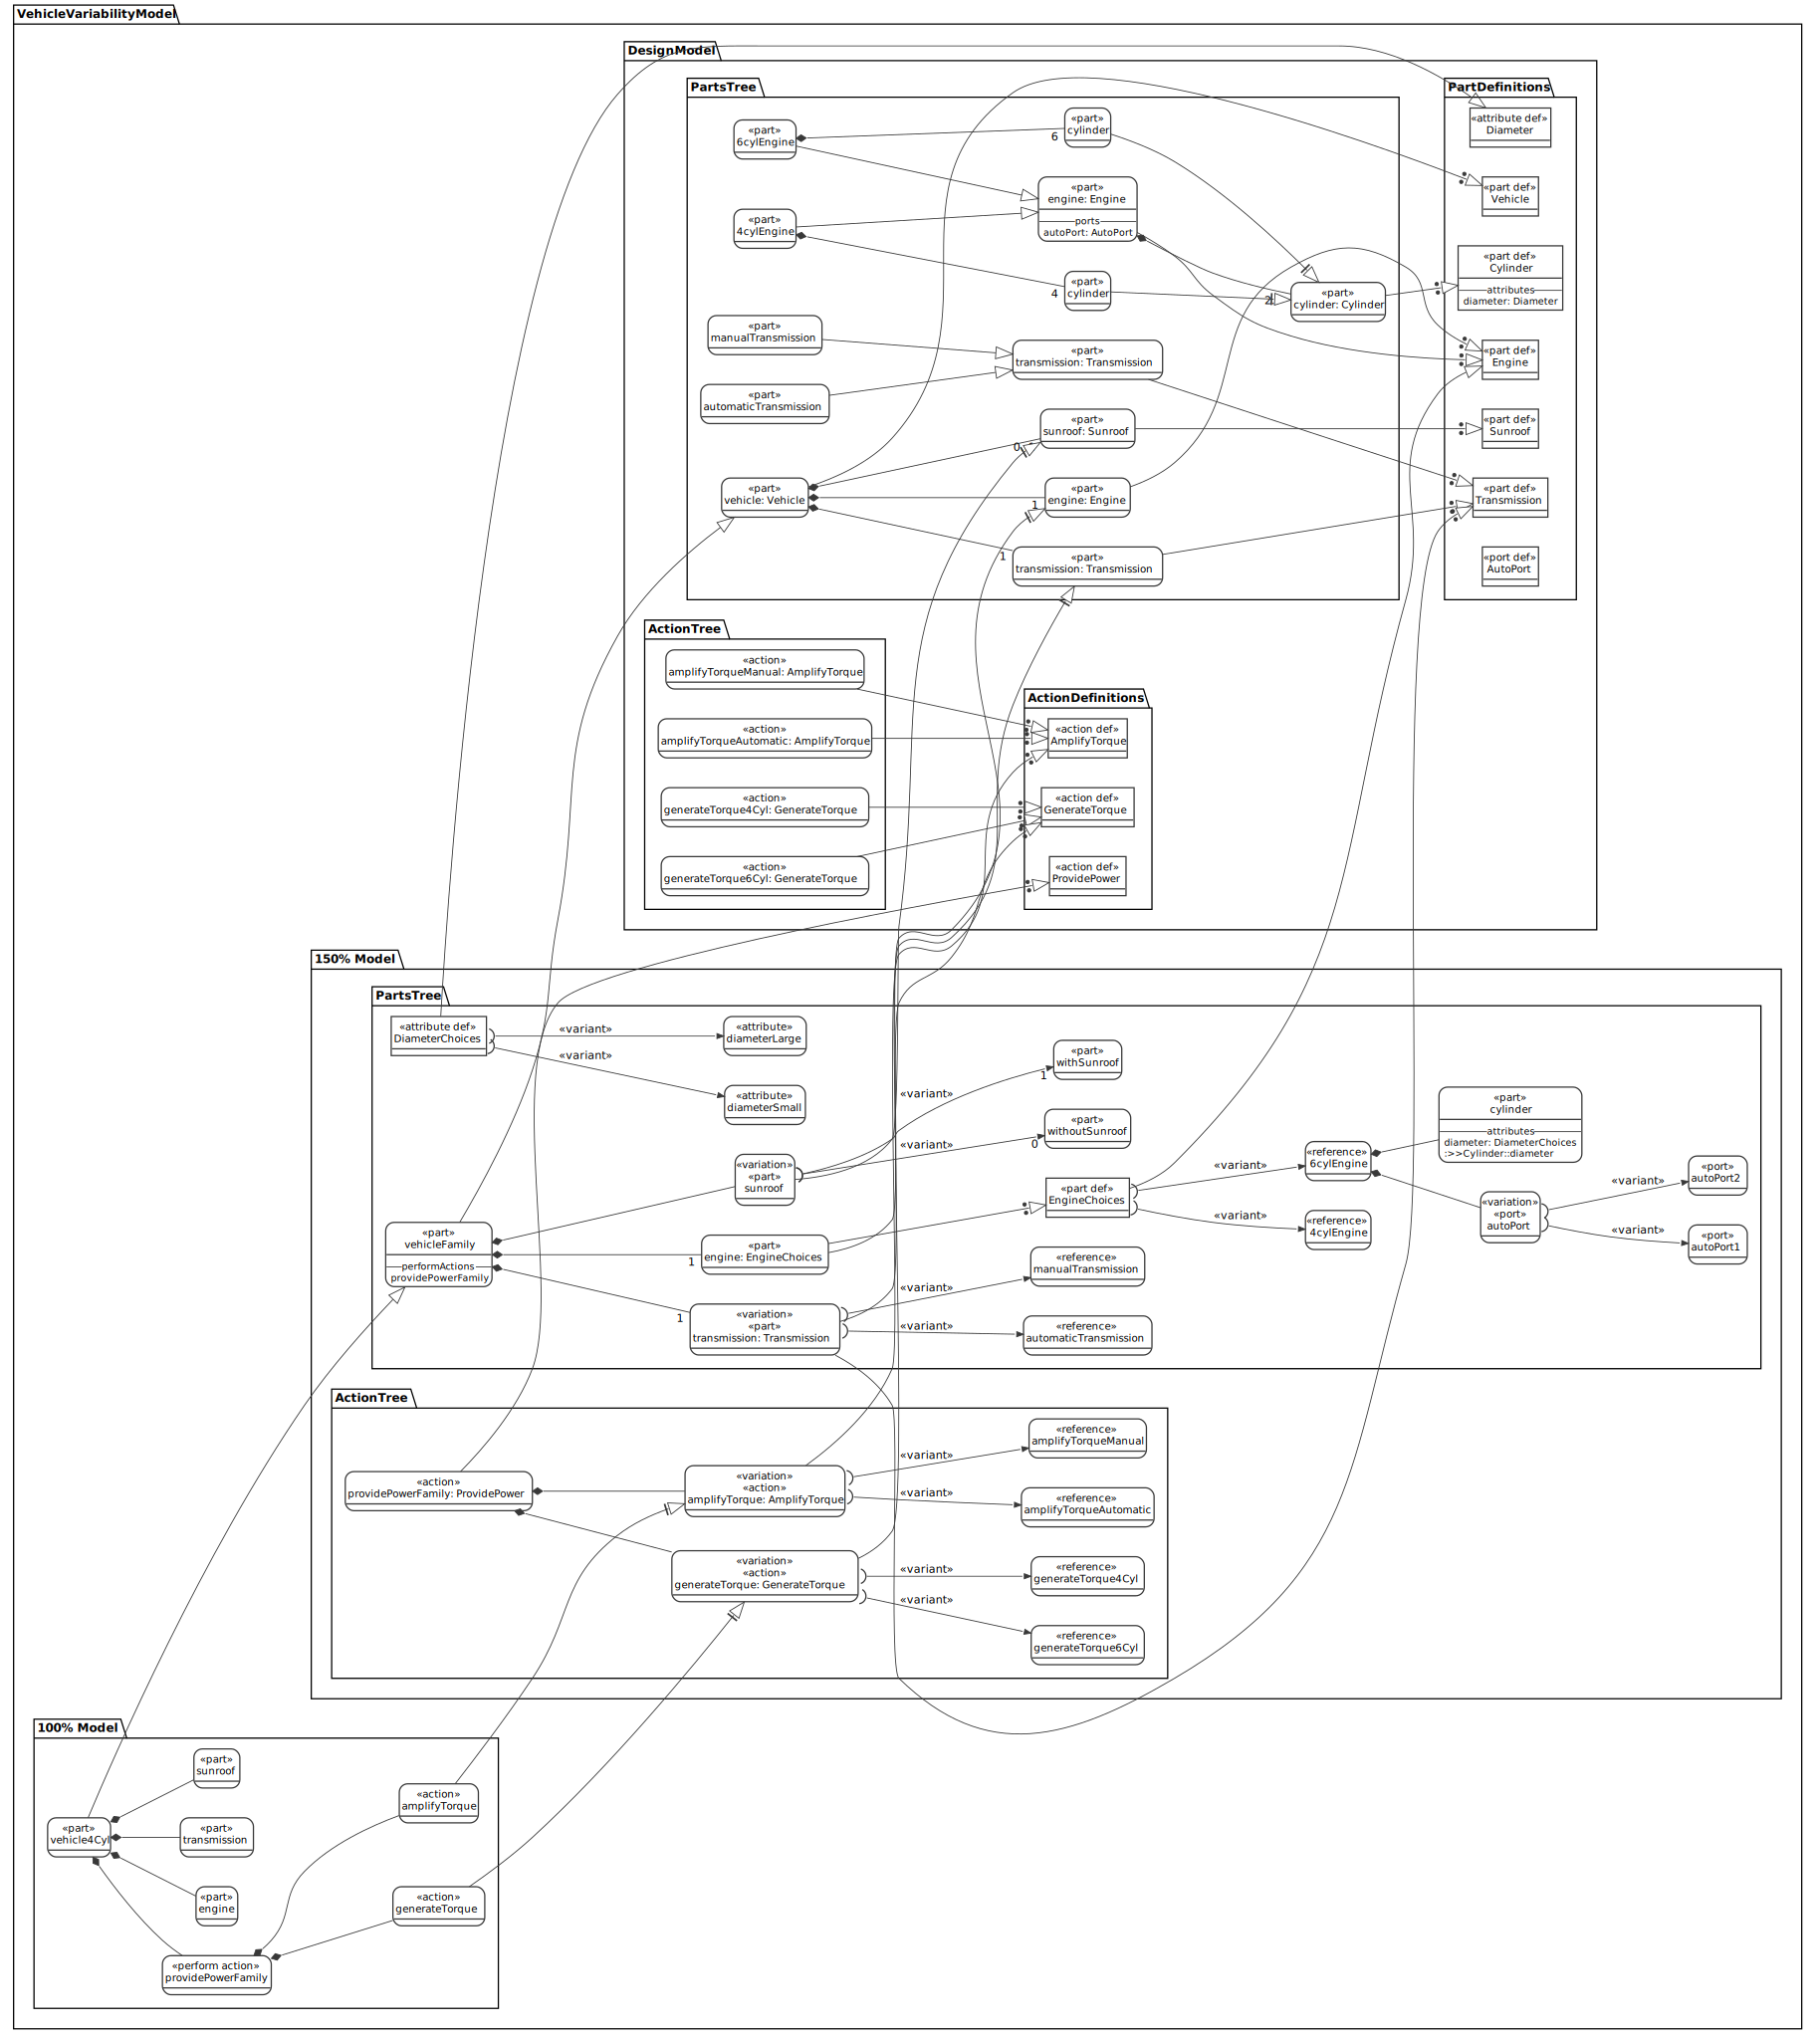

In [17]:
%viz --style="LR" --view="Tree" "VehicleVariabilityModel"

In [18]:
%viz --style="LR" --view="State" "VehicleVariabilityModel"

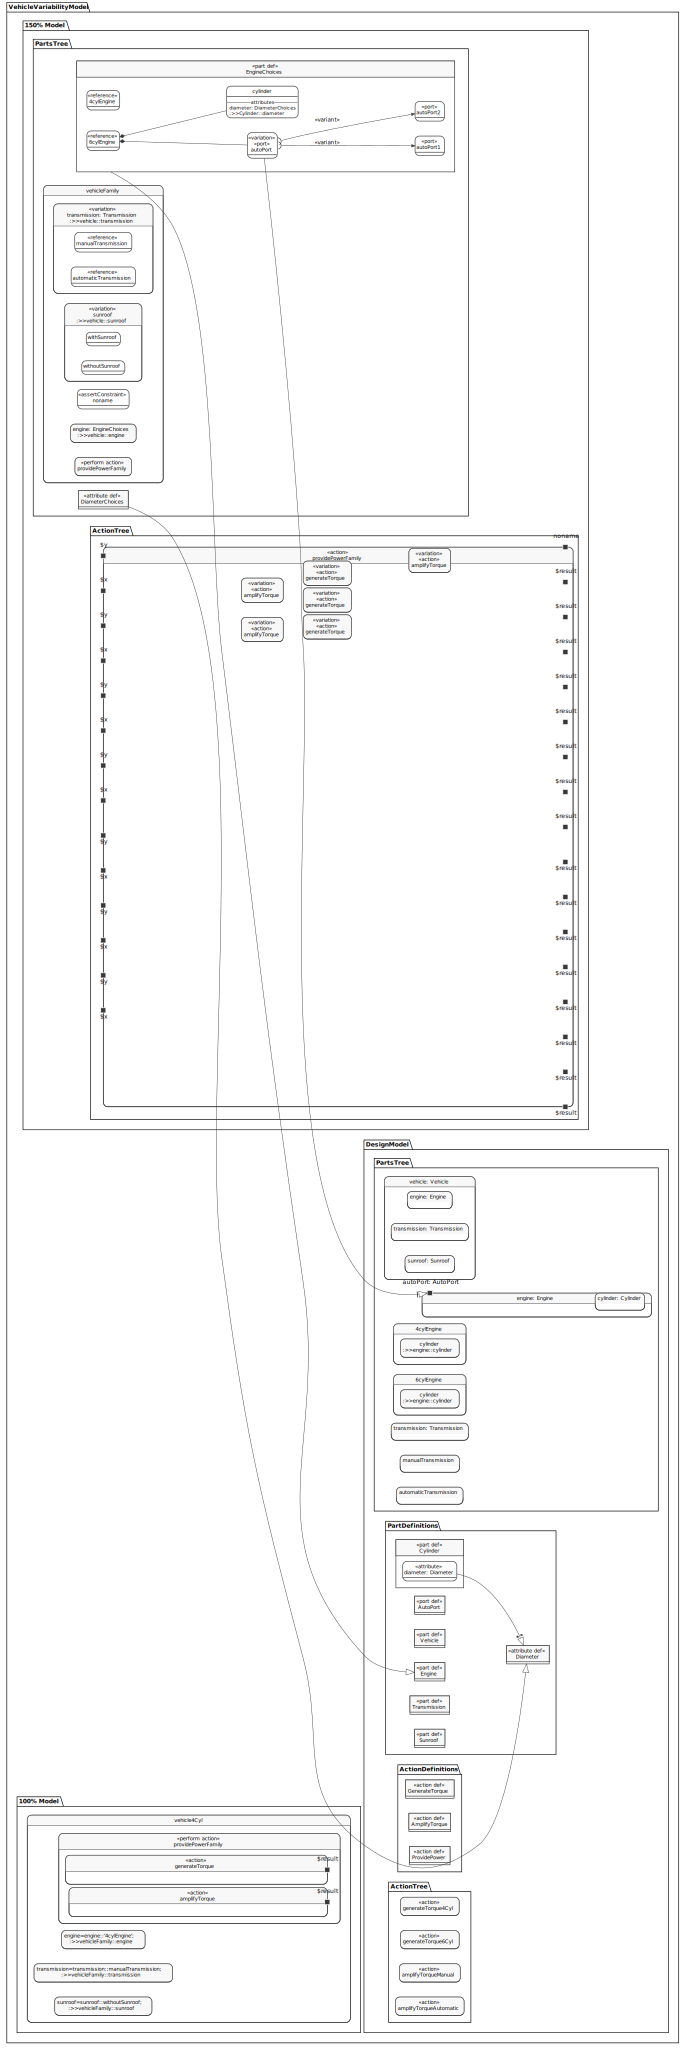

In [19]:
%viz --style="LR" --view="Interconnection" "VehicleVariabilityModel"

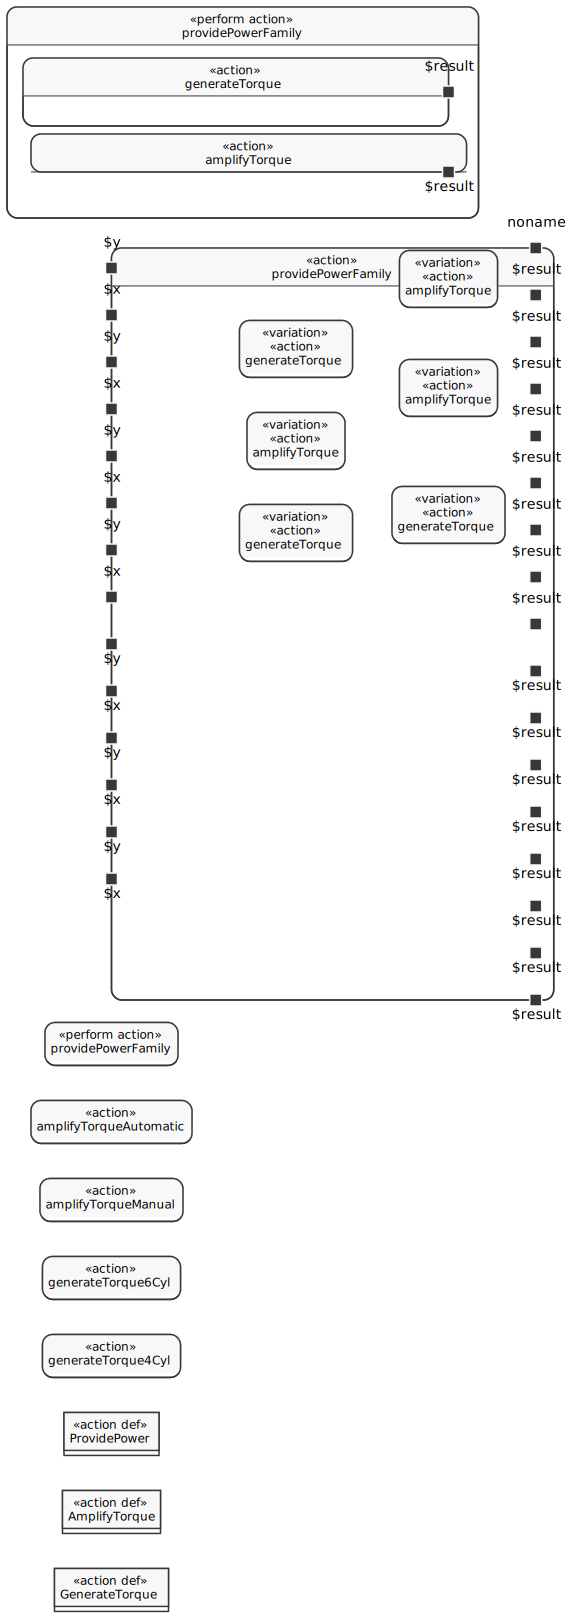

In [20]:
%viz --style="LR" --view="Action" "VehicleVariabilityModel"

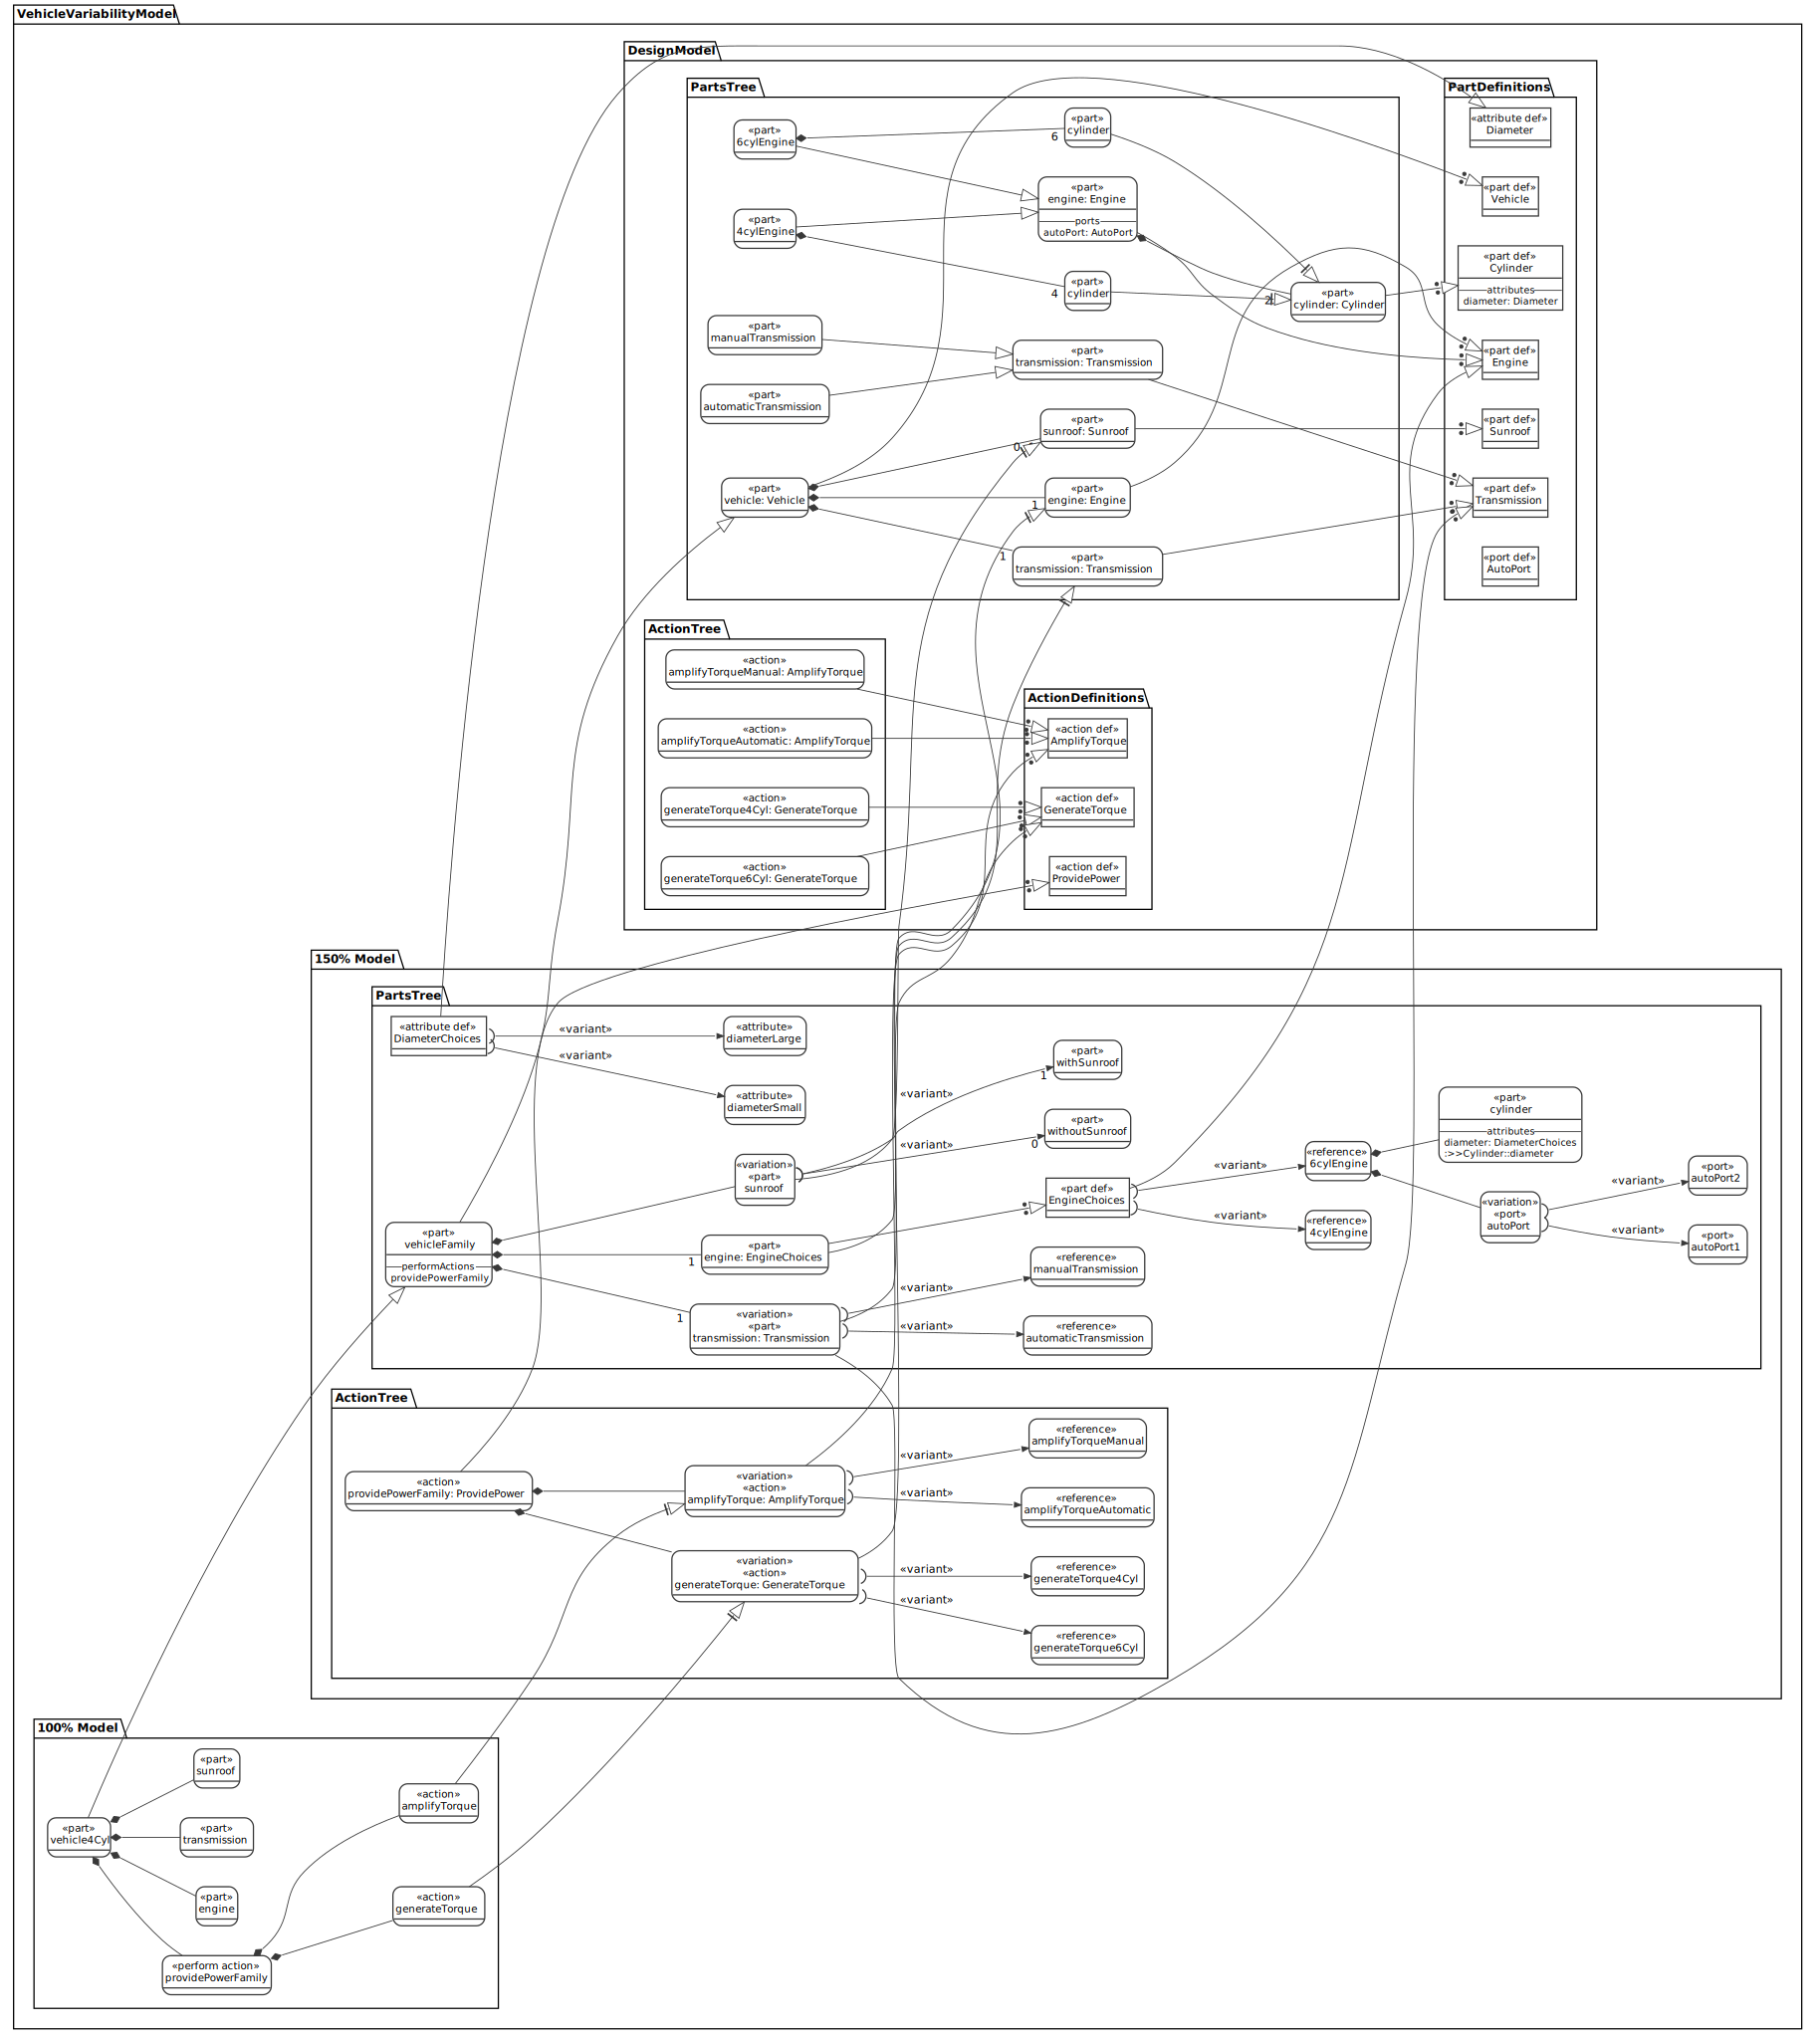

In [21]:
%viz --style="LR" --view="Sequence" "VehicleVariabilityModel"

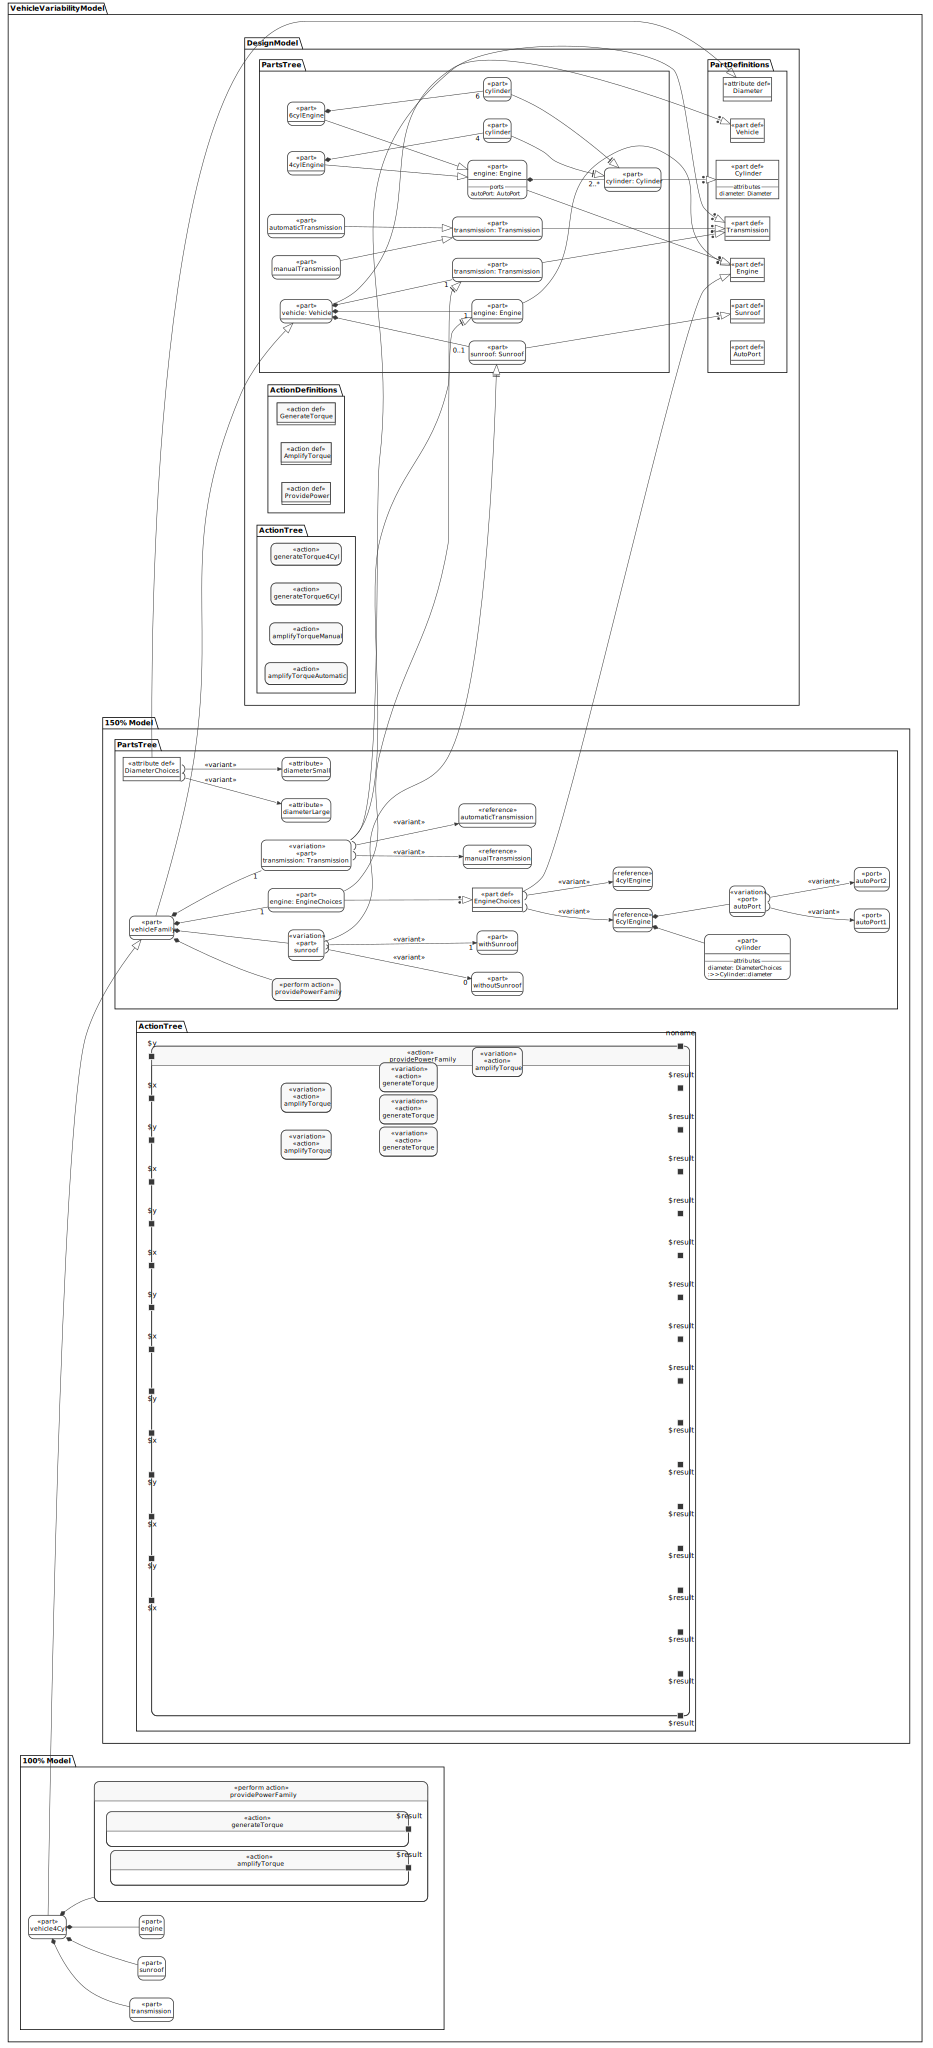

In [22]:
%viz --style="LR" --view="MIXED" "VehicleVariabilityModel"

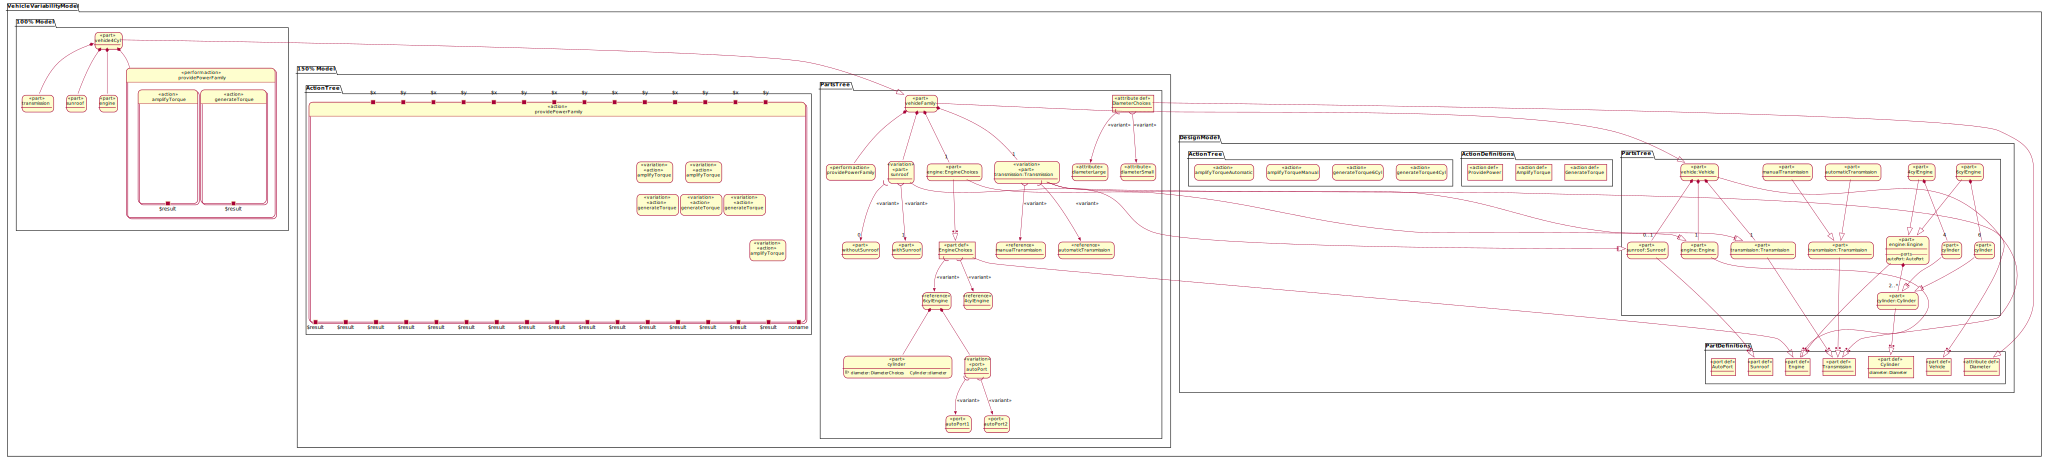

In [23]:
%viz --style="STDCOLOR" --view="Default" "VehicleVariabilityModel"

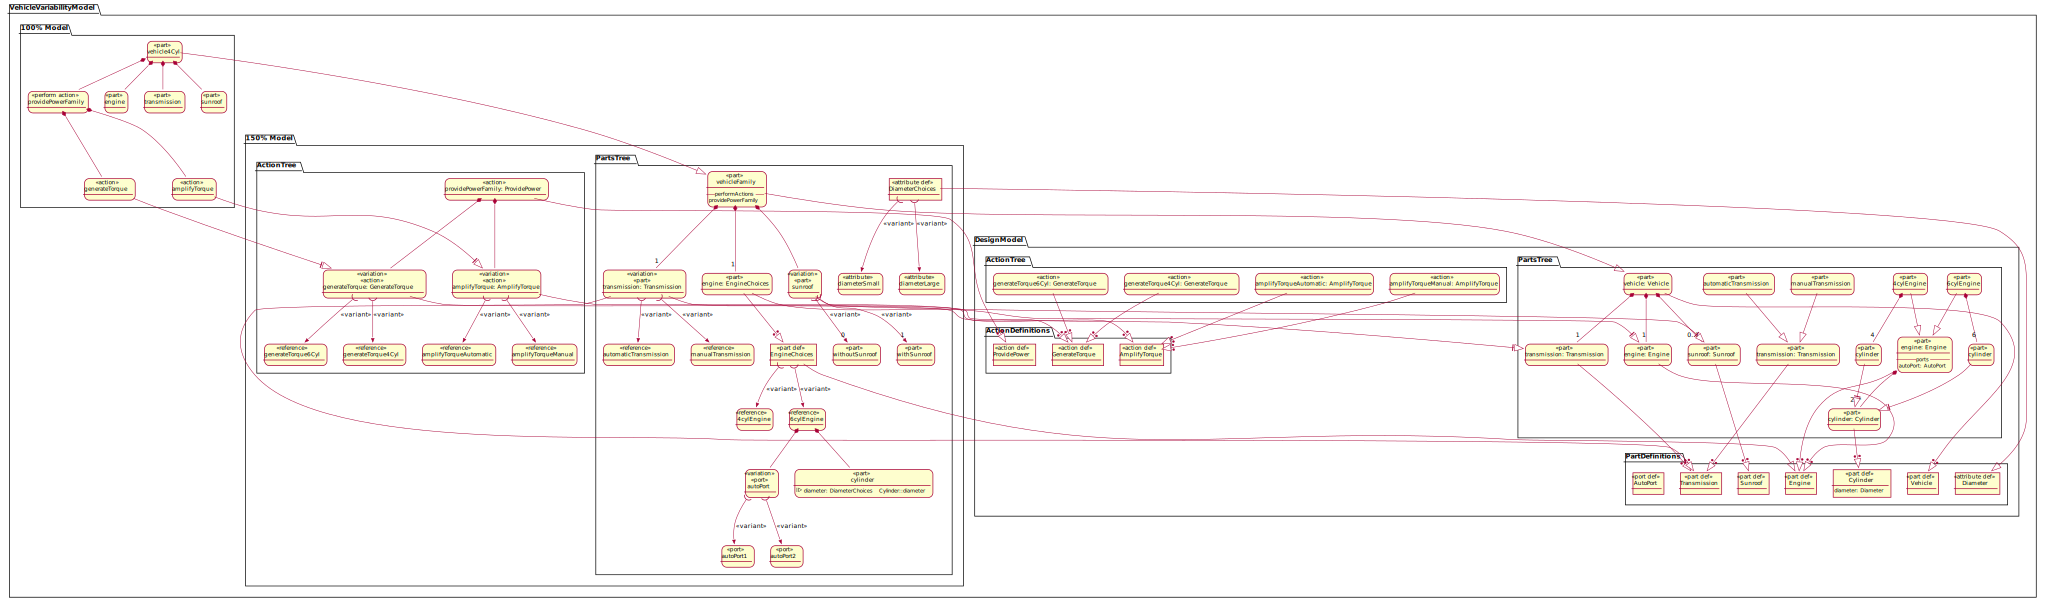

In [24]:
%viz --style="STDCOLOR" --view="Tree" "VehicleVariabilityModel"

In [25]:
%viz --style="STDCOLOR" --view="State" "VehicleVariabilityModel"

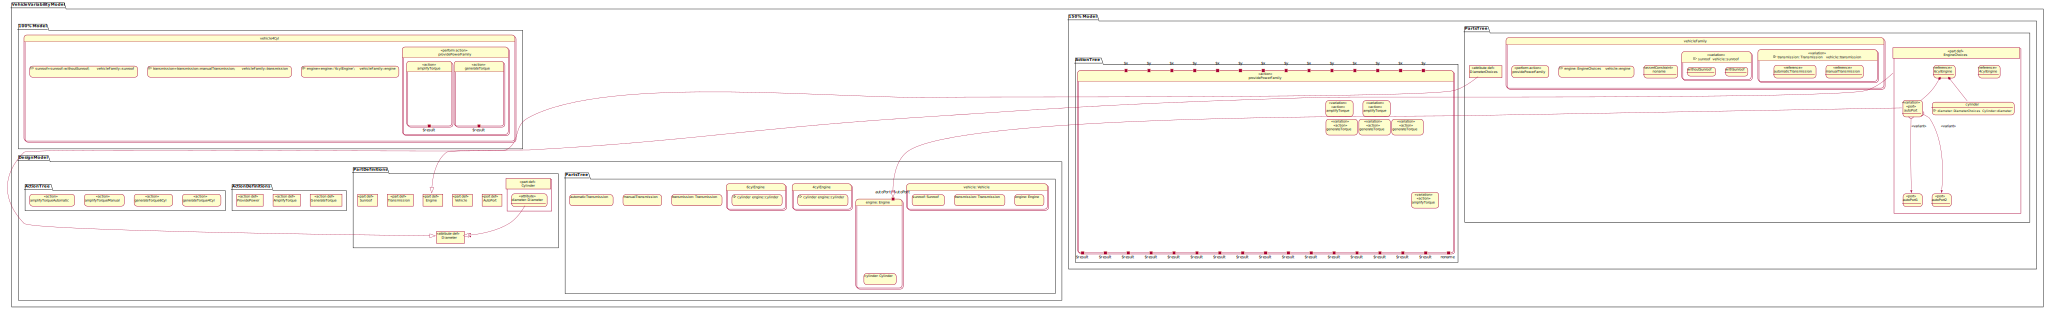

In [26]:
%viz --style="STDCOLOR" --view="Interconnection" "VehicleVariabilityModel"

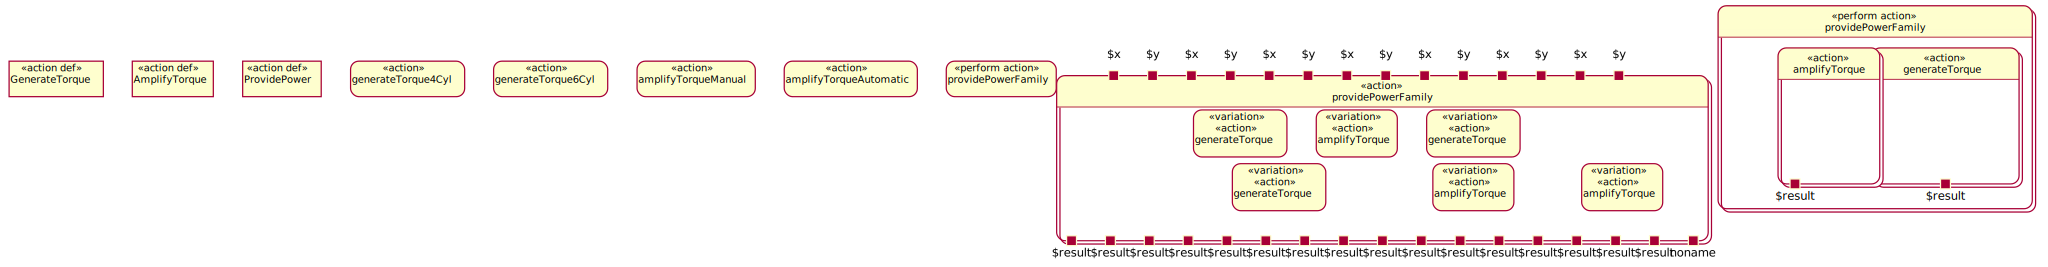

In [27]:
%viz --style="STDCOLOR" --view="Action" "VehicleVariabilityModel"

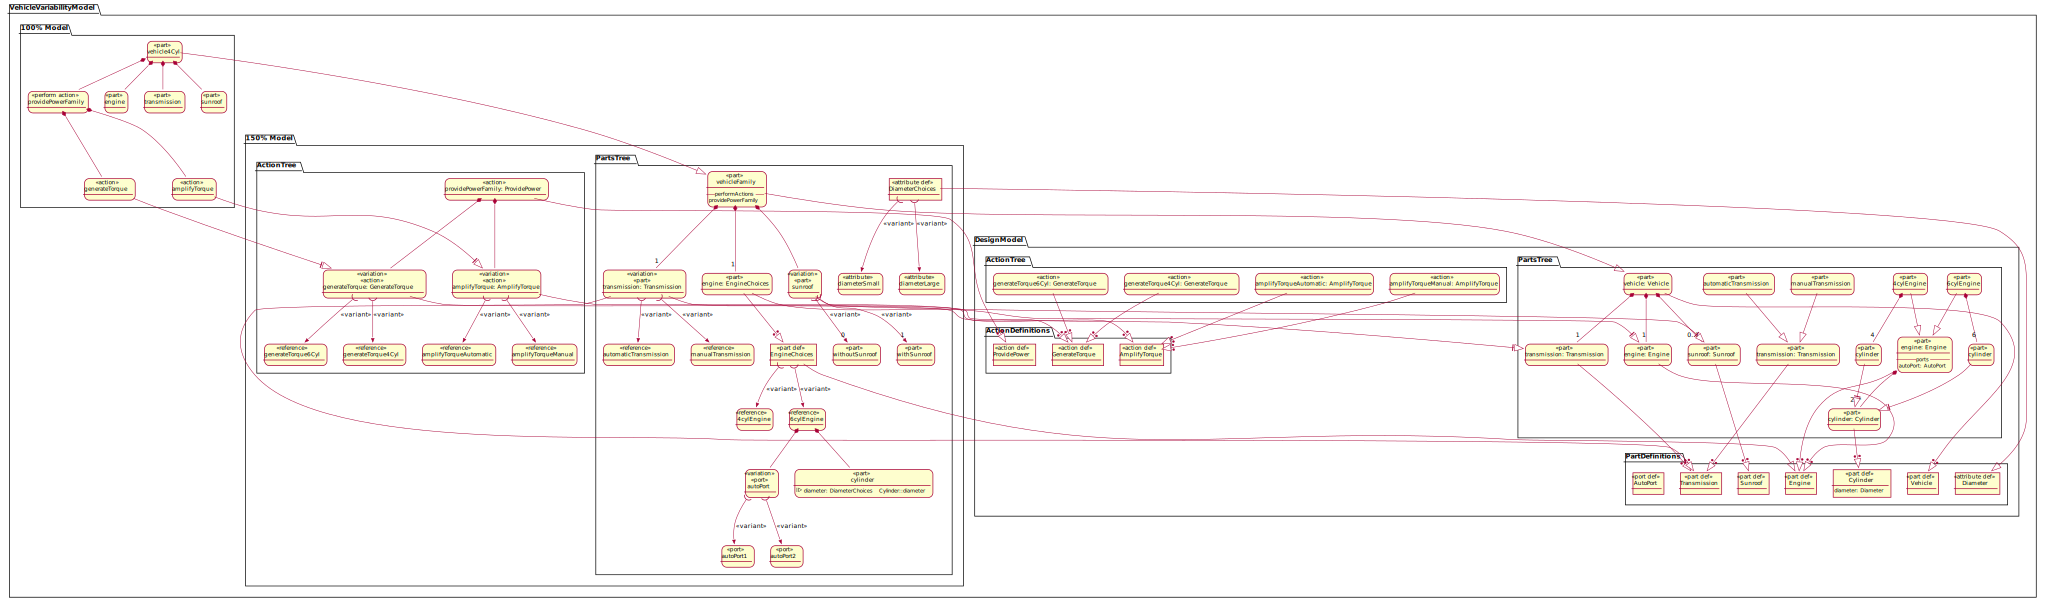

In [28]:
%viz --style="STDCOLOR" --view="Sequence" "VehicleVariabilityModel"

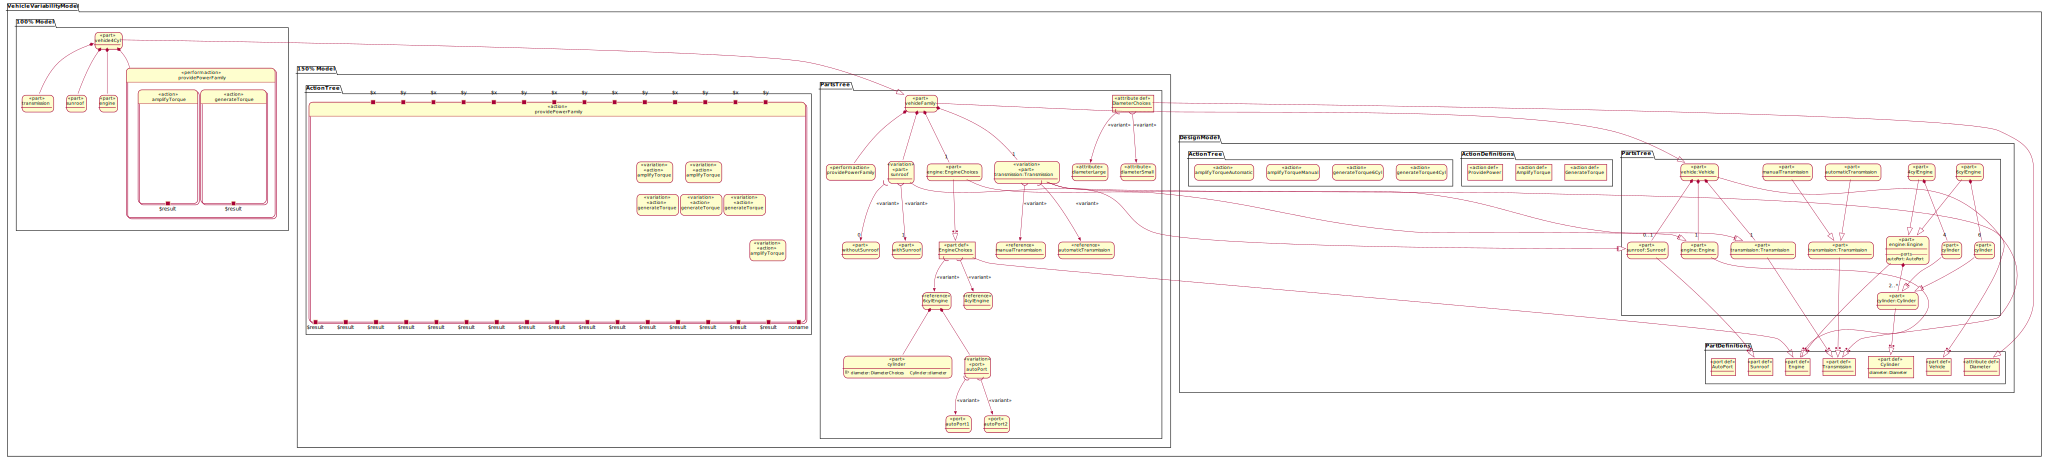

In [29]:
%viz --style="STDCOLOR" --view="MIXED" "VehicleVariabilityModel"

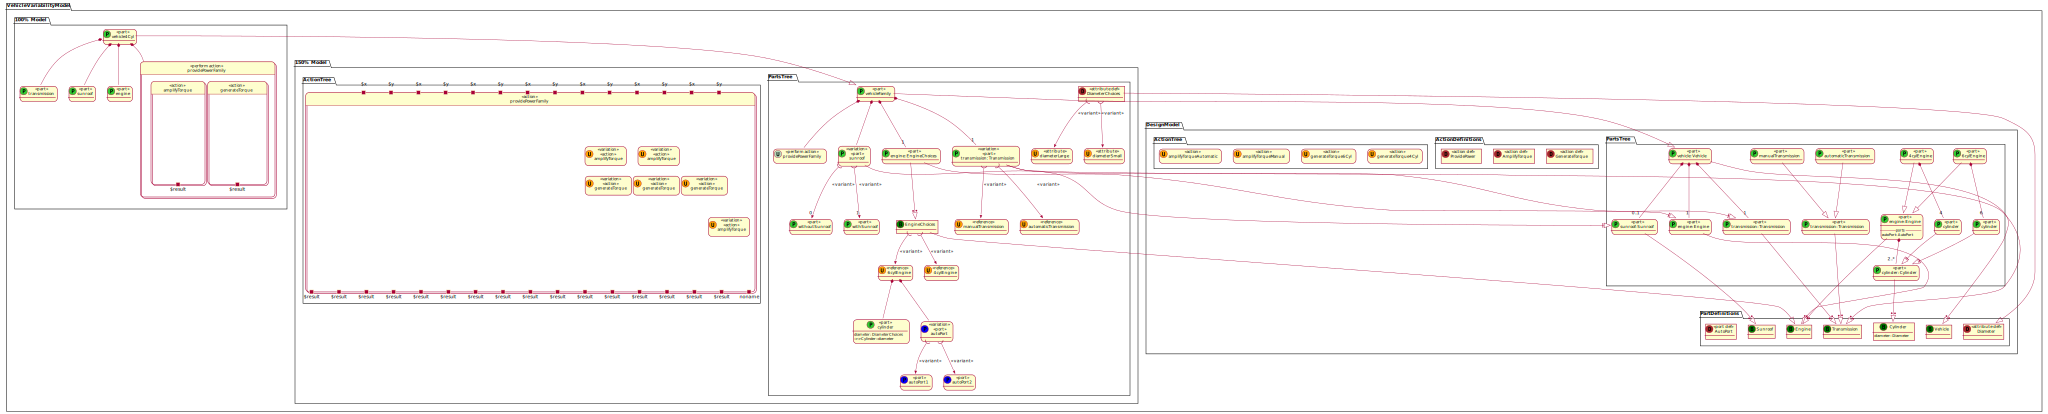

In [30]:
%viz --style="PLANTUML" --view="Default" "VehicleVariabilityModel"

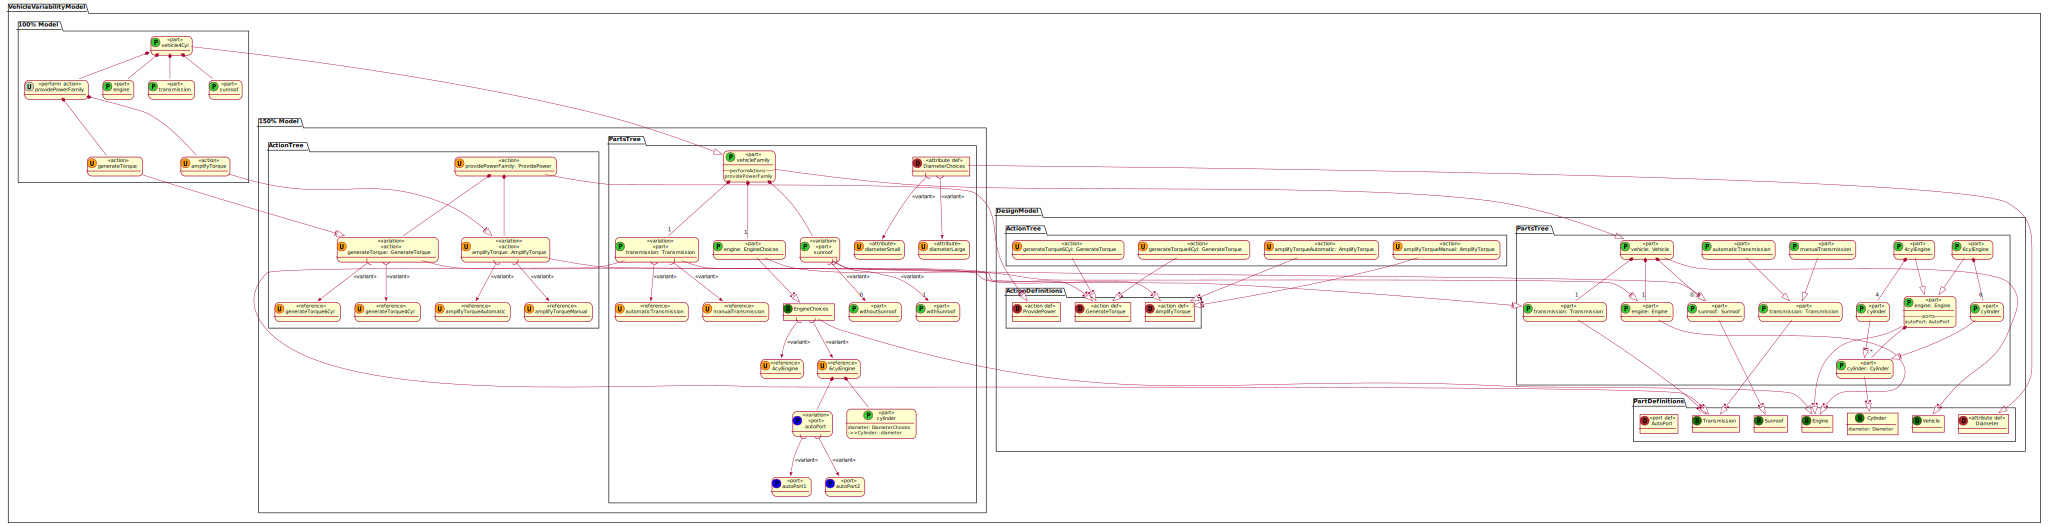

In [31]:
%viz --style="PLANTUML" --view="Tree" "VehicleVariabilityModel"

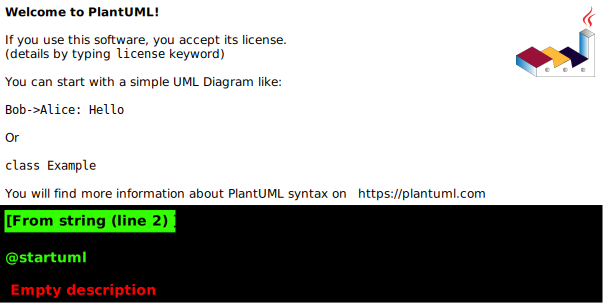

In [32]:
%viz --style="PLANTUML" --view="State" "VehicleVariabilityModel"

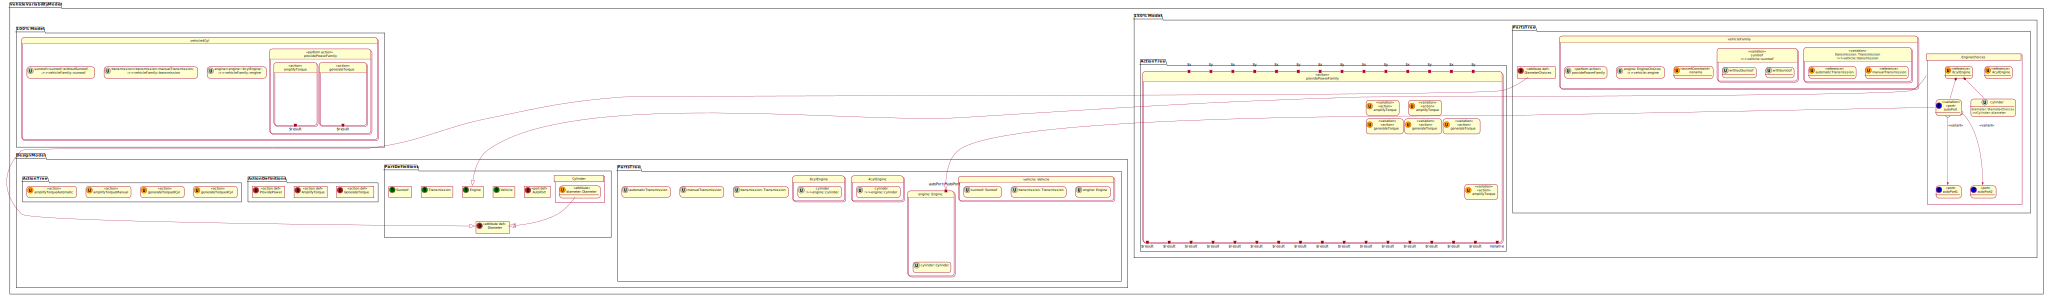

In [33]:
%viz --style="PLANTUML" --view="Interconnection" "VehicleVariabilityModel"

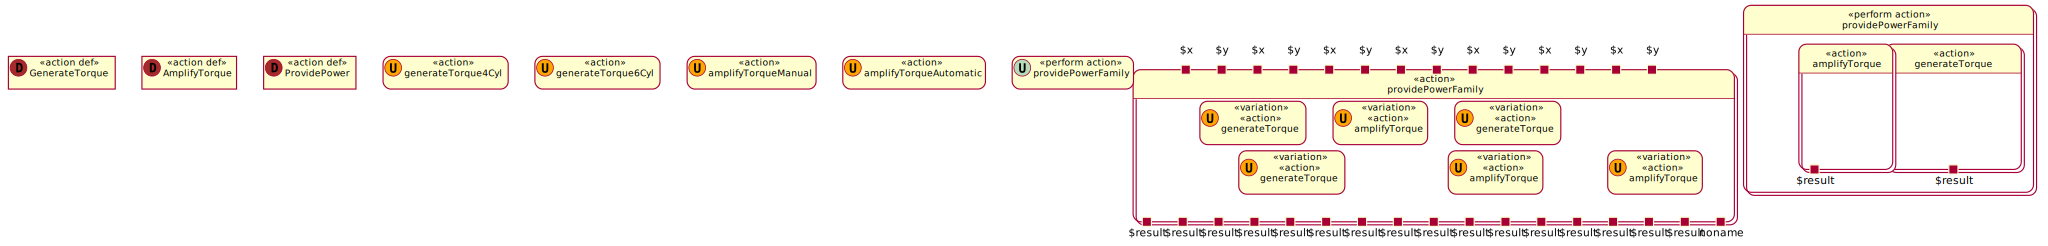

In [34]:
%viz --style="PLANTUML" --view="Action" "VehicleVariabilityModel"

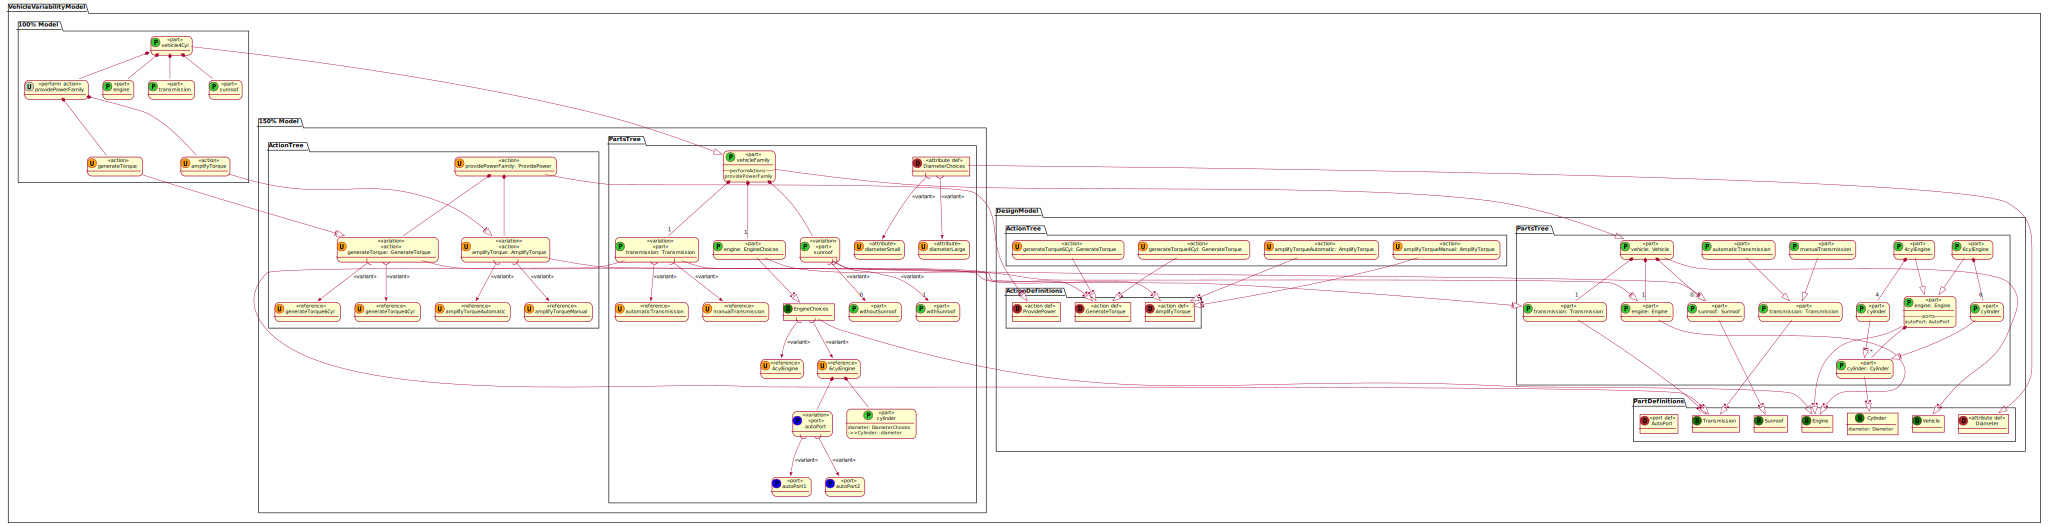

In [35]:
%viz --style="PLANTUML" --view="Sequence" "VehicleVariabilityModel"

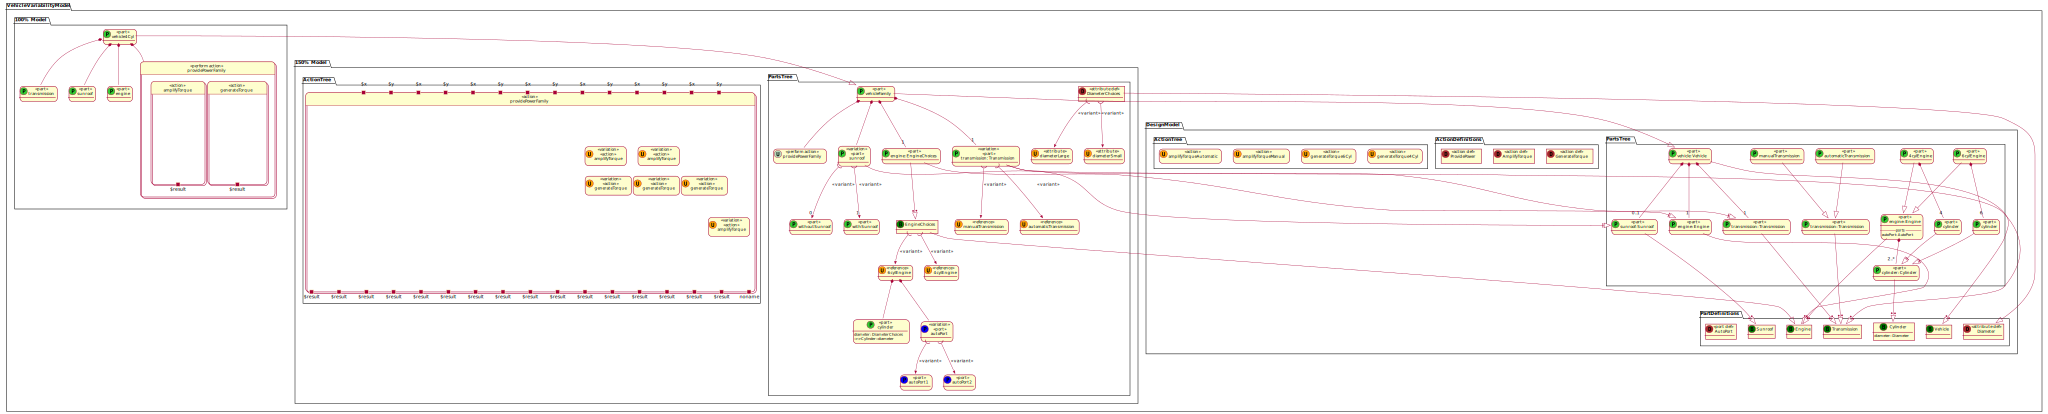

In [36]:
%viz --style="PLANTUML" --view="MIXED" "VehicleVariabilityModel"

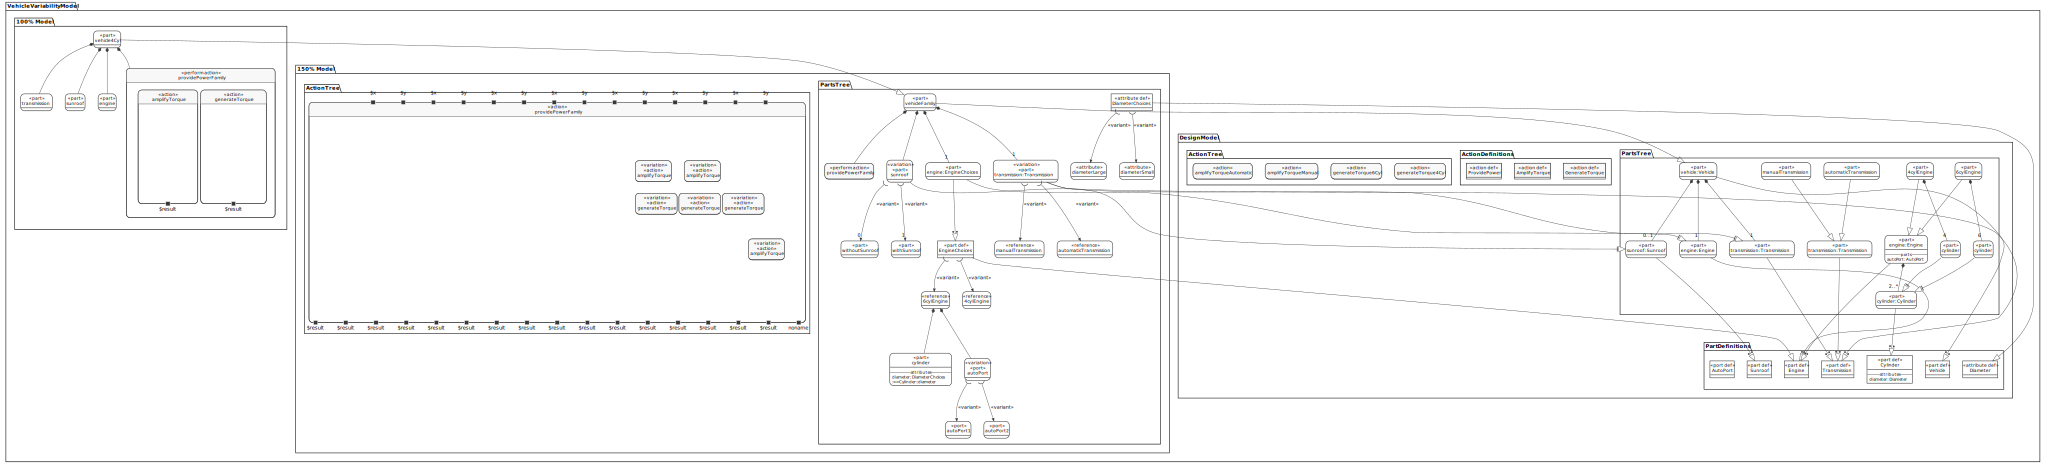

In [37]:
%viz --style="DEFAULT" --view="Default" "VehicleVariabilityModel"

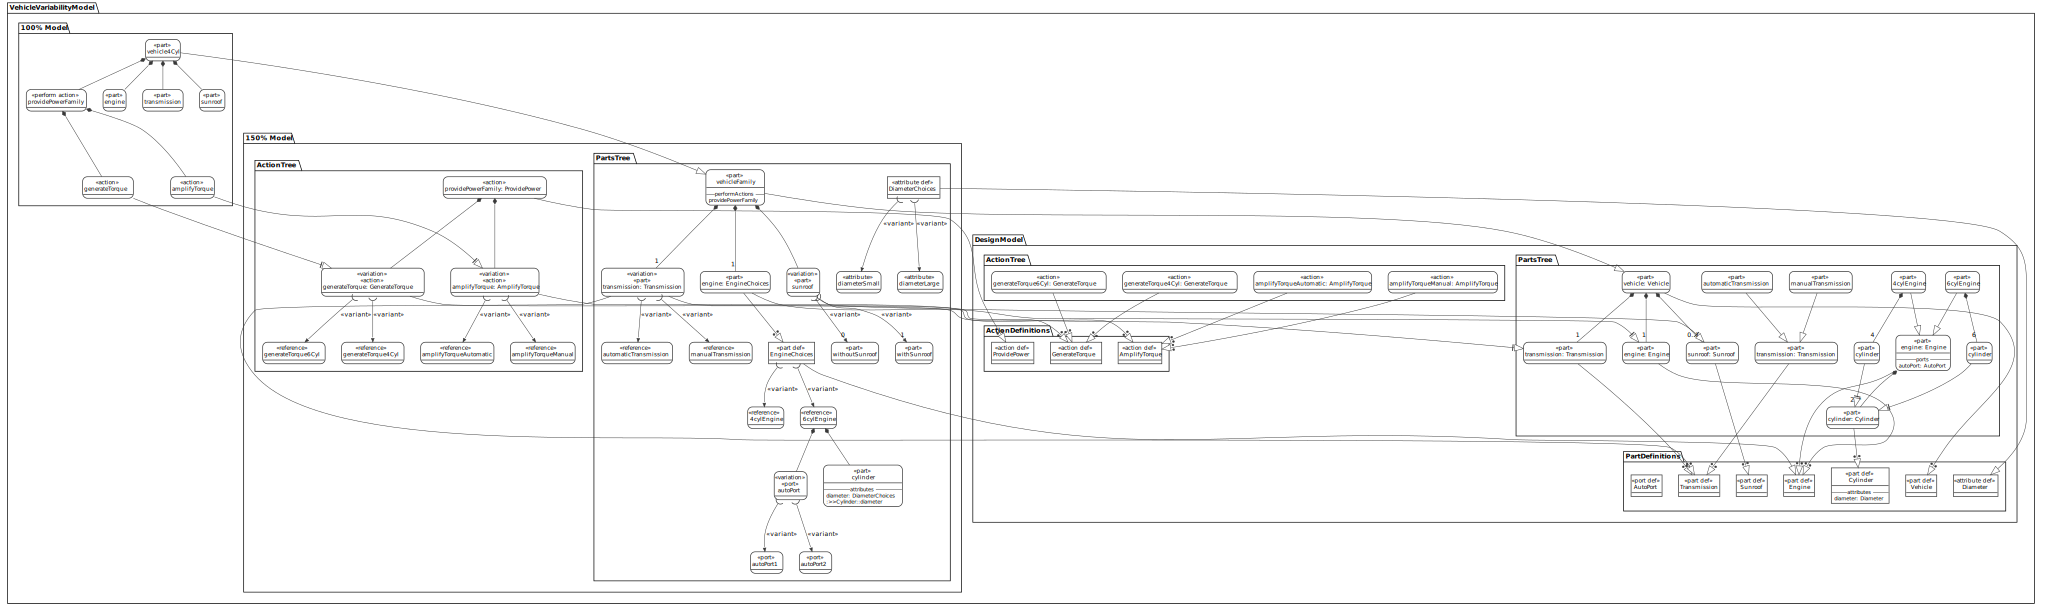

In [38]:
%viz --style="DEFAULT" --view="Tree" "VehicleVariabilityModel"

In [39]:
%viz --style="DEFAULT" --view="State" "VehicleVariabilityModel"

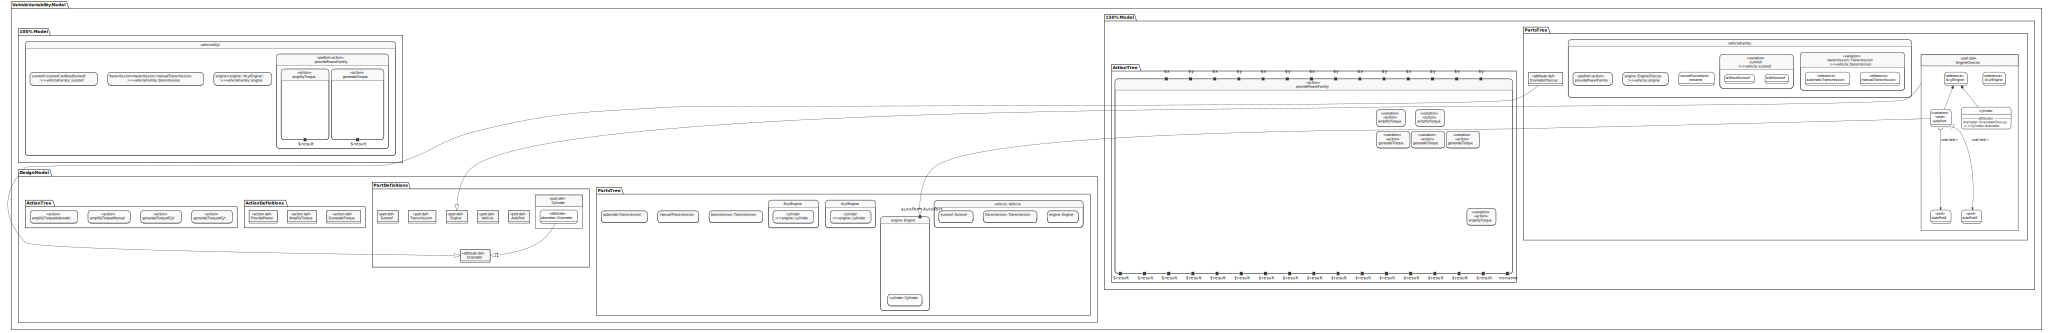

In [40]:
%viz --style="DEFAULT" --view="Interconnection" "VehicleVariabilityModel"

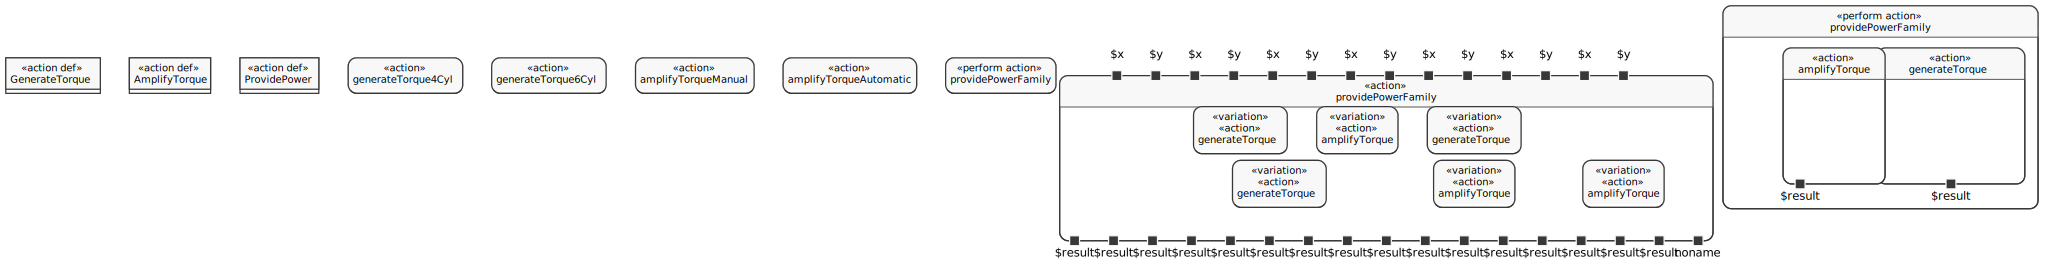

In [41]:
%viz --style="DEFAULT" --view="Action" "VehicleVariabilityModel"

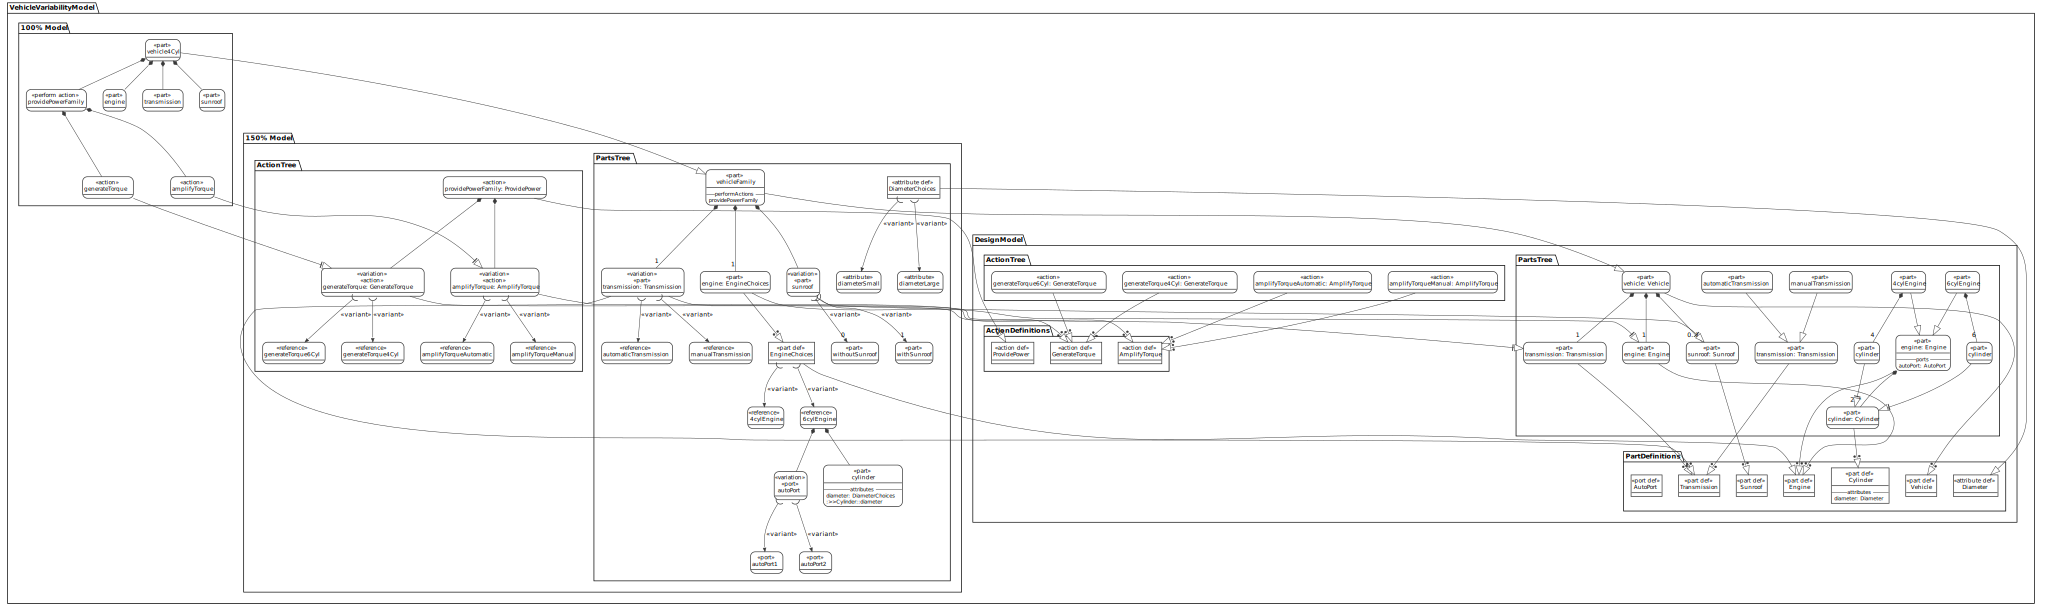

In [42]:
%viz --style="DEFAULT" --view="Sequence" "VehicleVariabilityModel"

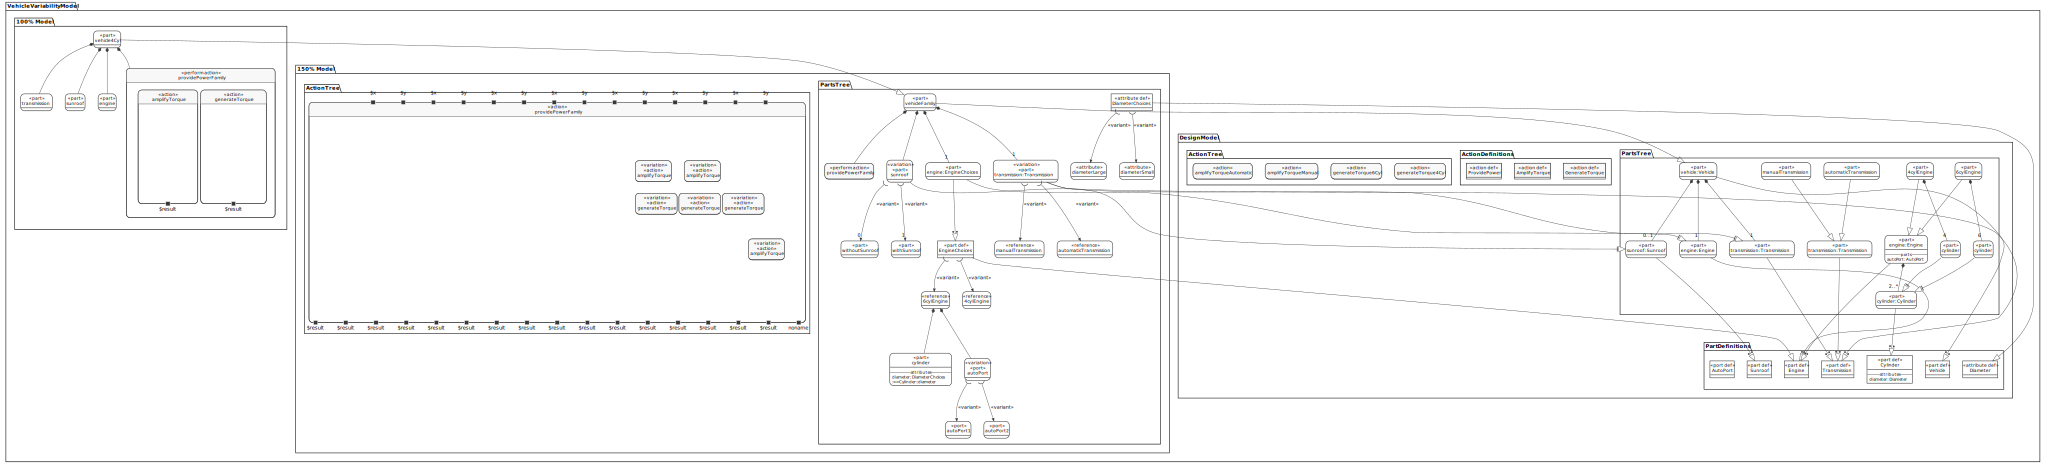

In [43]:
%viz --style="DEFAULT" --view="MIXED" "VehicleVariabilityModel"

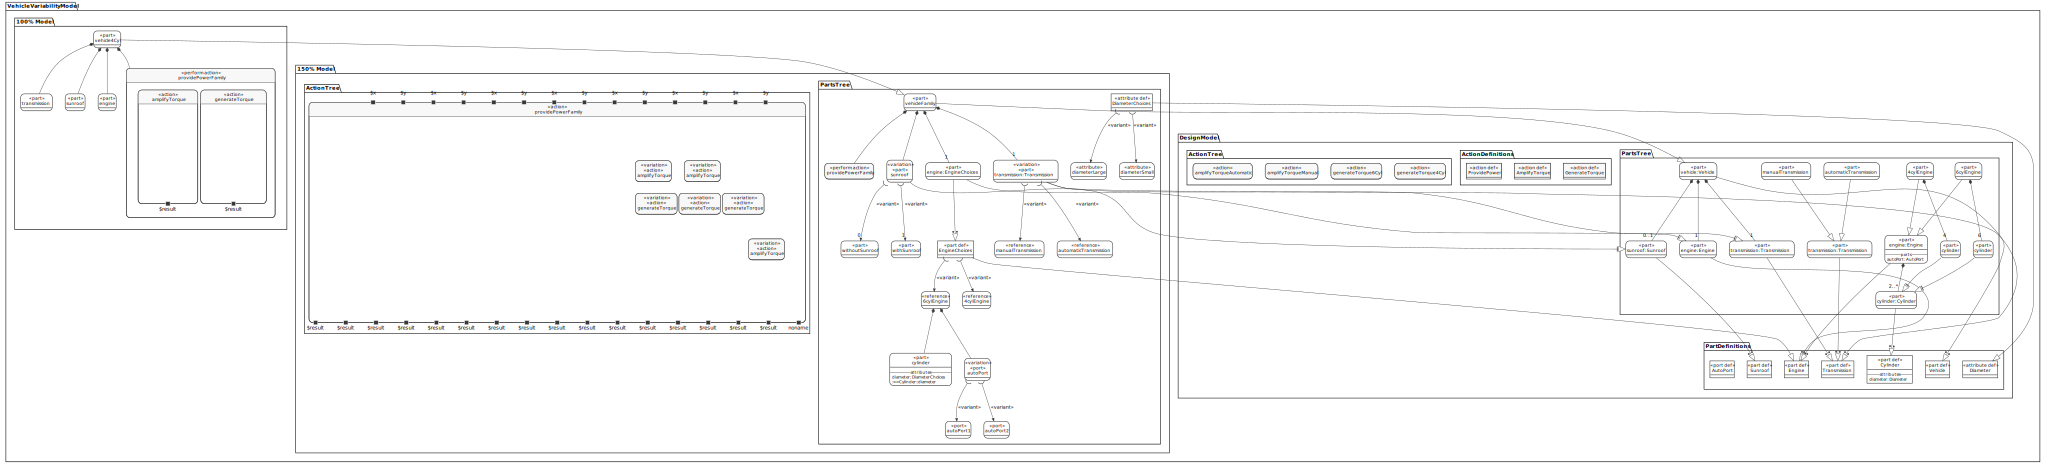

In [44]:
%viz --style="TB" --view="Default" "VehicleVariabilityModel"

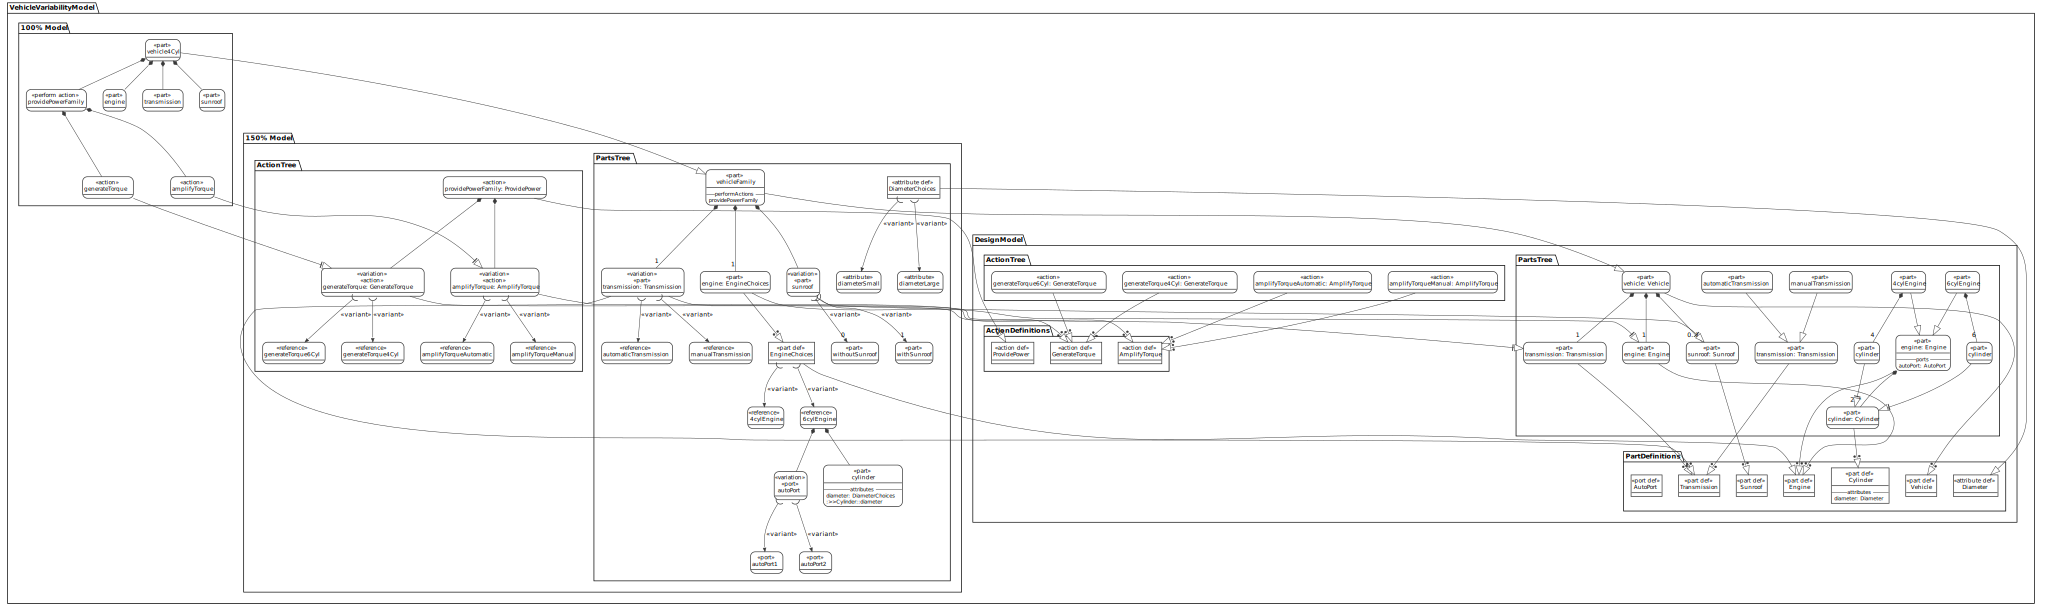

In [45]:
%viz --style="TB" --view="Tree" "VehicleVariabilityModel"

In [46]:
%viz --style="TB" --view="State" "VehicleVariabilityModel"

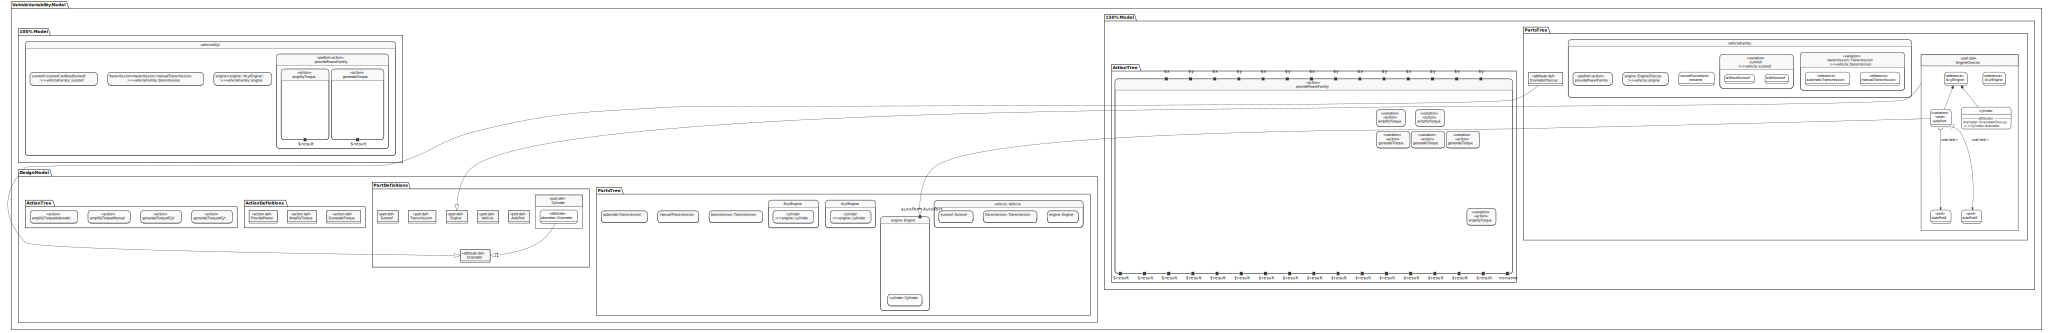

In [47]:
%viz --style="TB" --view="Interconnection" "VehicleVariabilityModel"

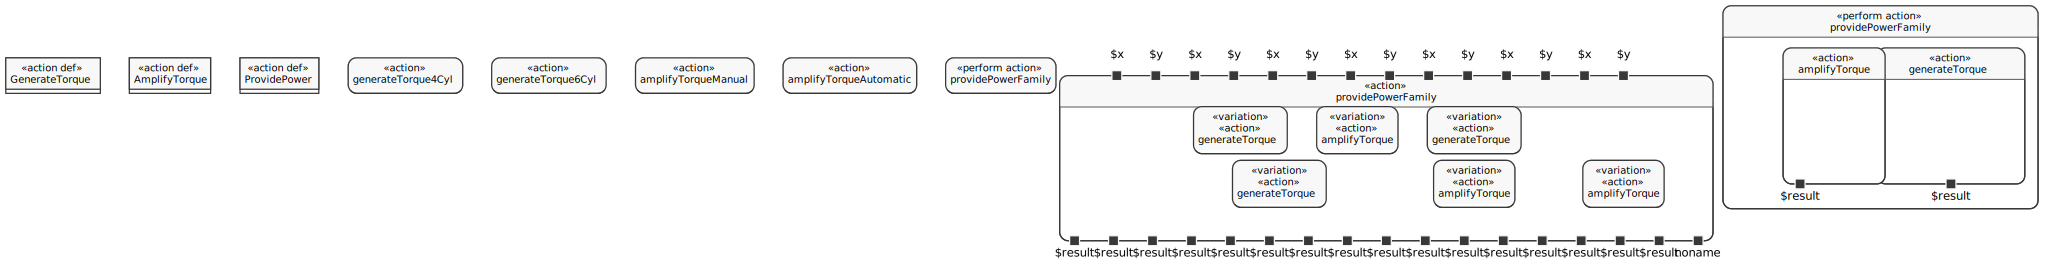

In [48]:
%viz --style="TB" --view="Action" "VehicleVariabilityModel"

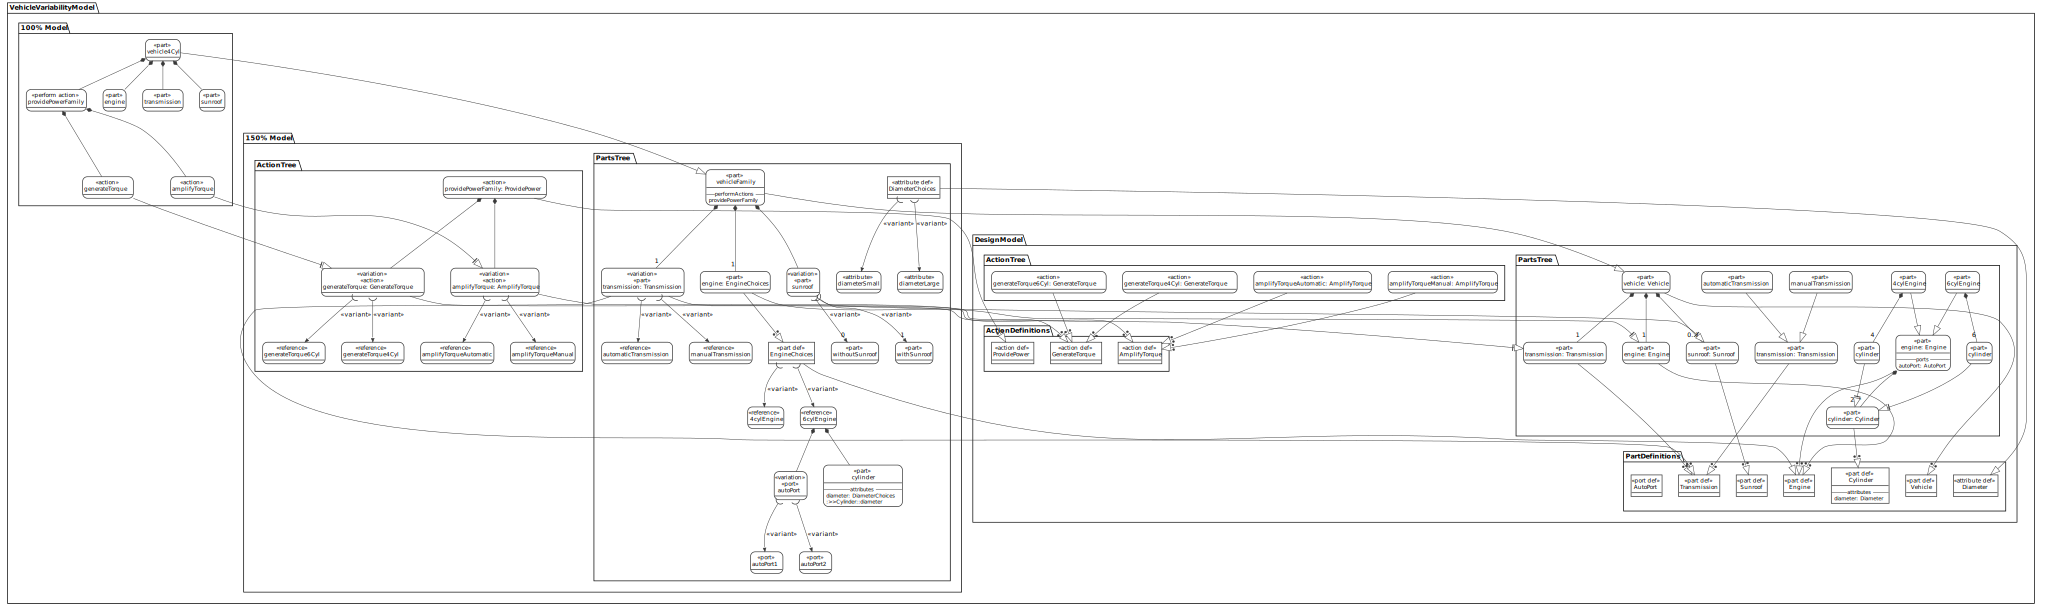

In [49]:
%viz --style="TB" --view="Sequence" "VehicleVariabilityModel"

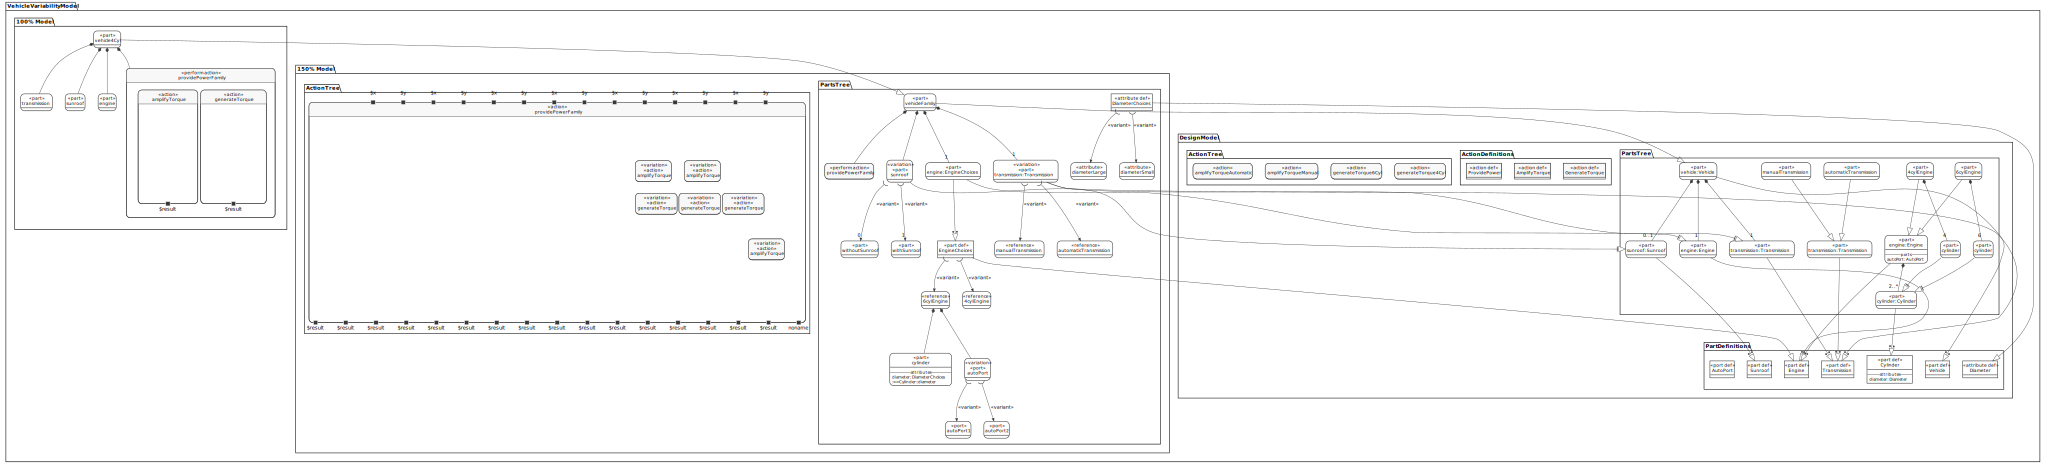

In [50]:
%viz --style="TB" --view="MIXED" "VehicleVariabilityModel"

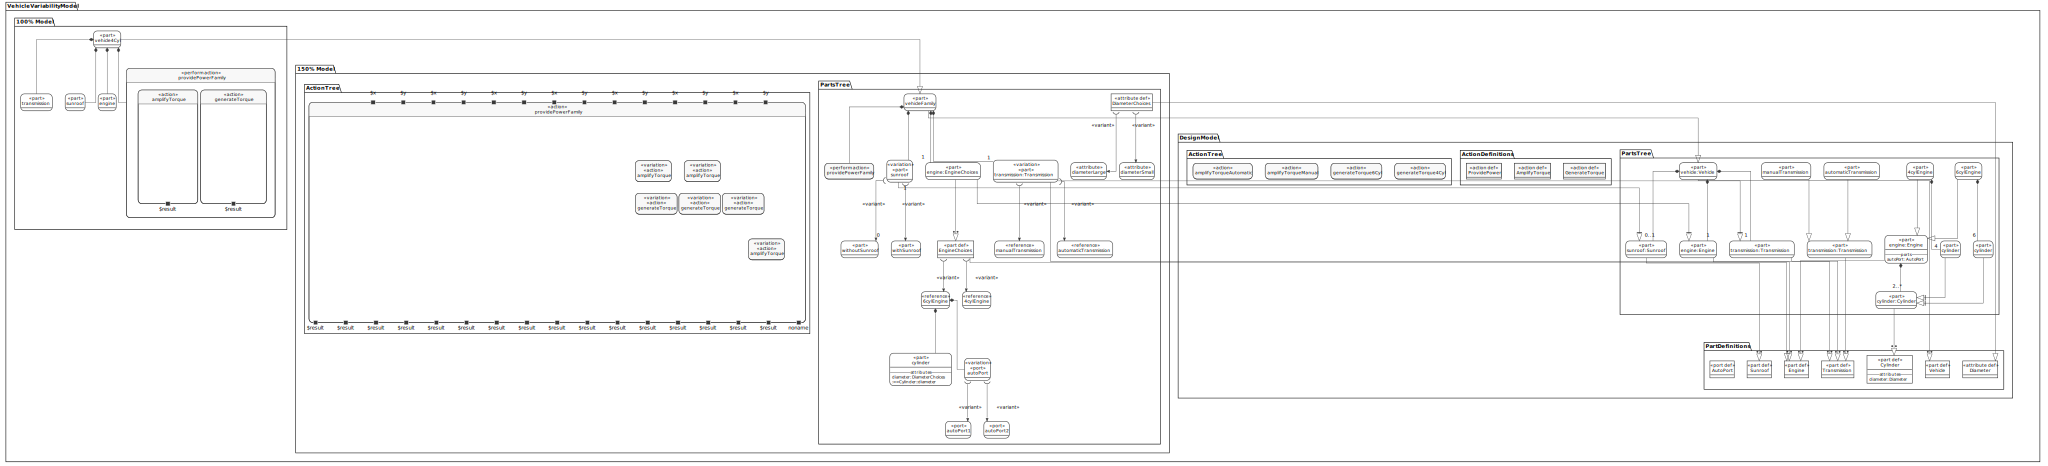

In [51]:
%viz --style="ORTHOLINE" --view="Default" "VehicleVariabilityModel"

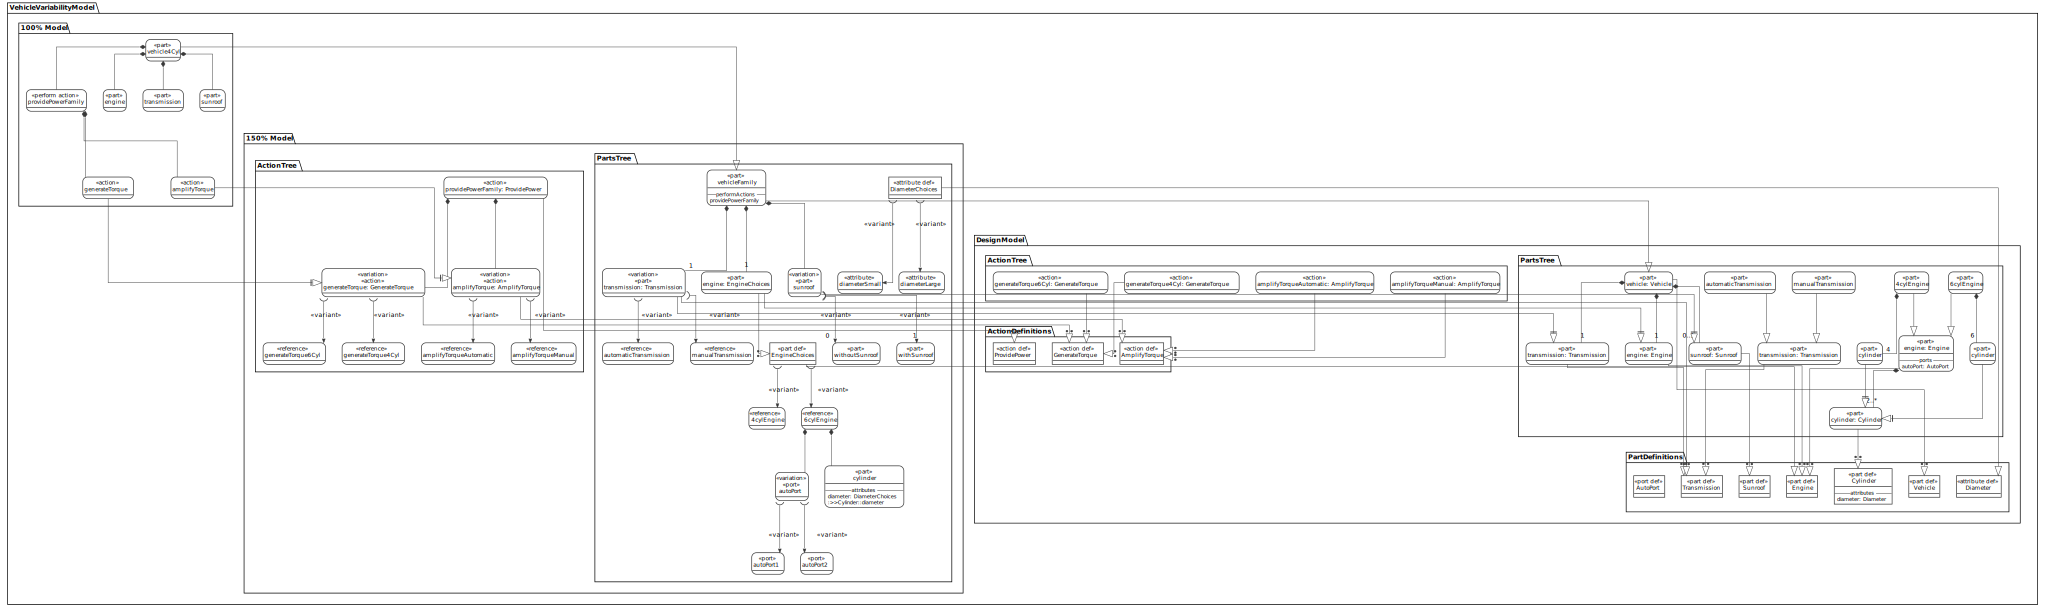

In [52]:
%viz --style="ORTHOLINE" --view="Tree" "VehicleVariabilityModel"

In [53]:
%viz --style="ORTHOLINE" --view="State" "VehicleVariabilityModel"

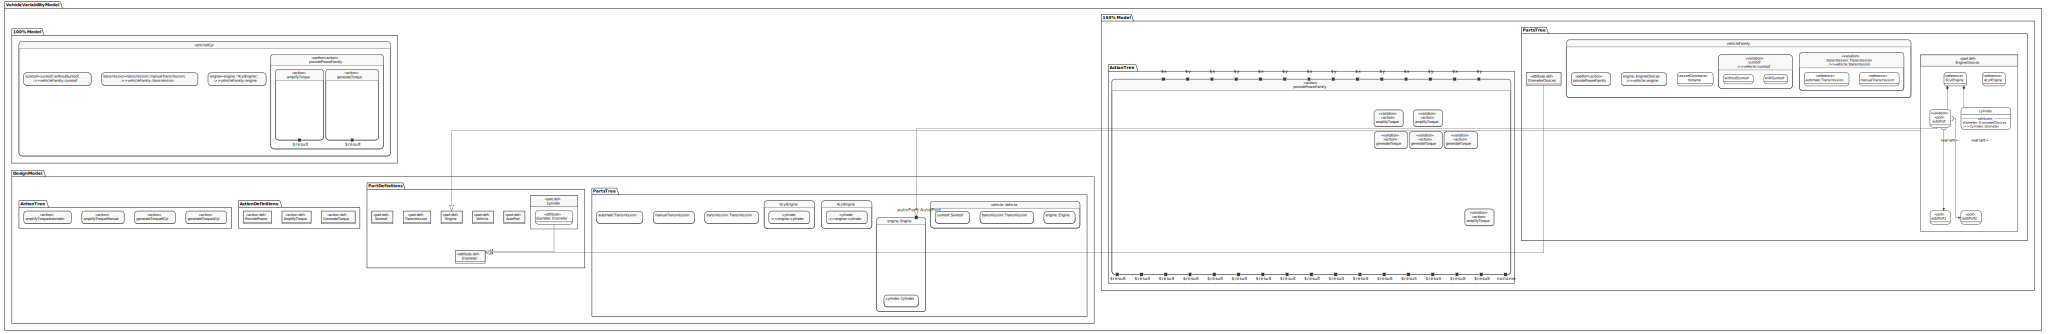

In [54]:
%viz --style="ORTHOLINE" --view="Interconnection" "VehicleVariabilityModel"

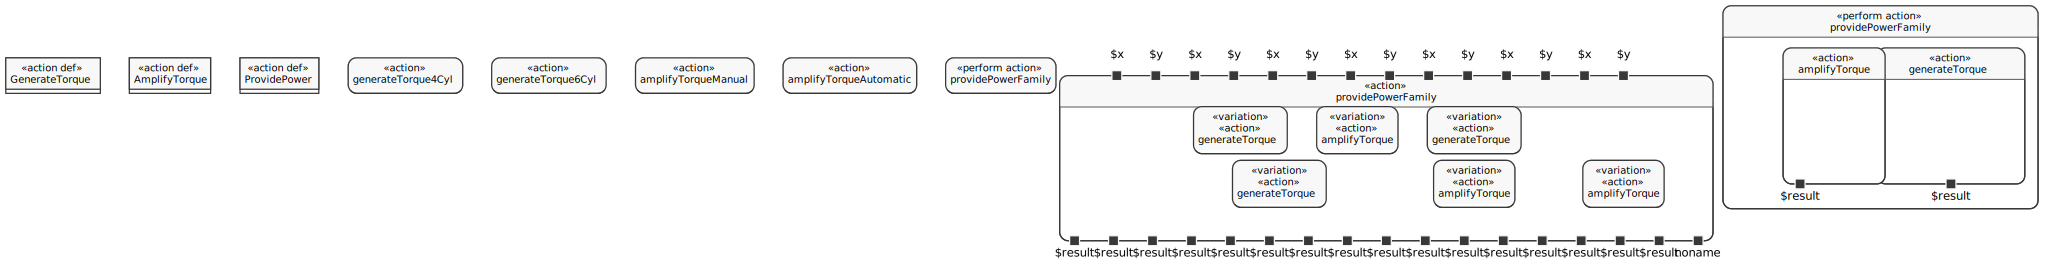

In [55]:
%viz --style="ORTHOLINE" --view="Action" "VehicleVariabilityModel"

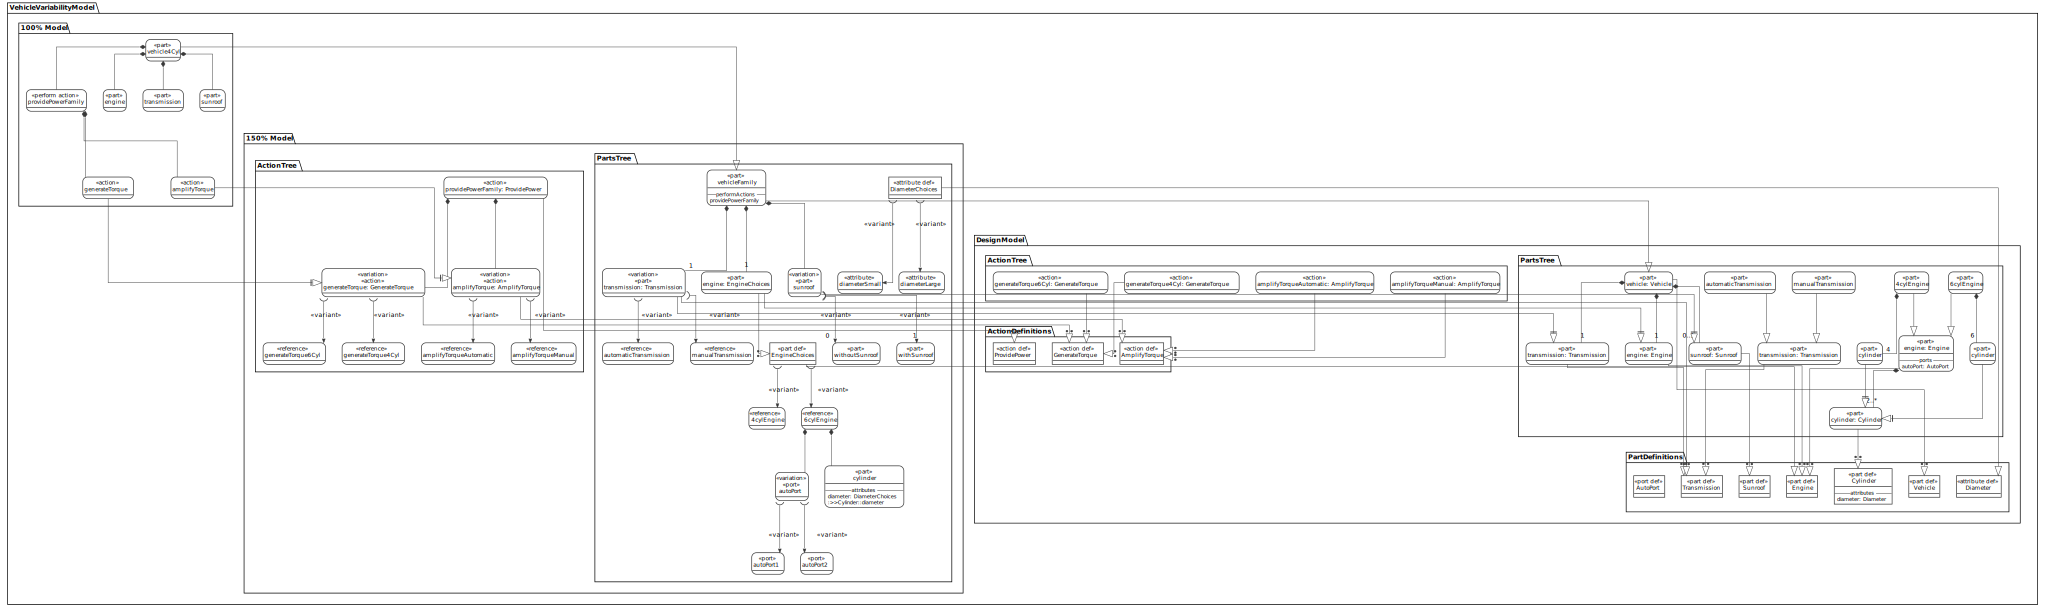

In [56]:
%viz --style="ORTHOLINE" --view="Sequence" "VehicleVariabilityModel"

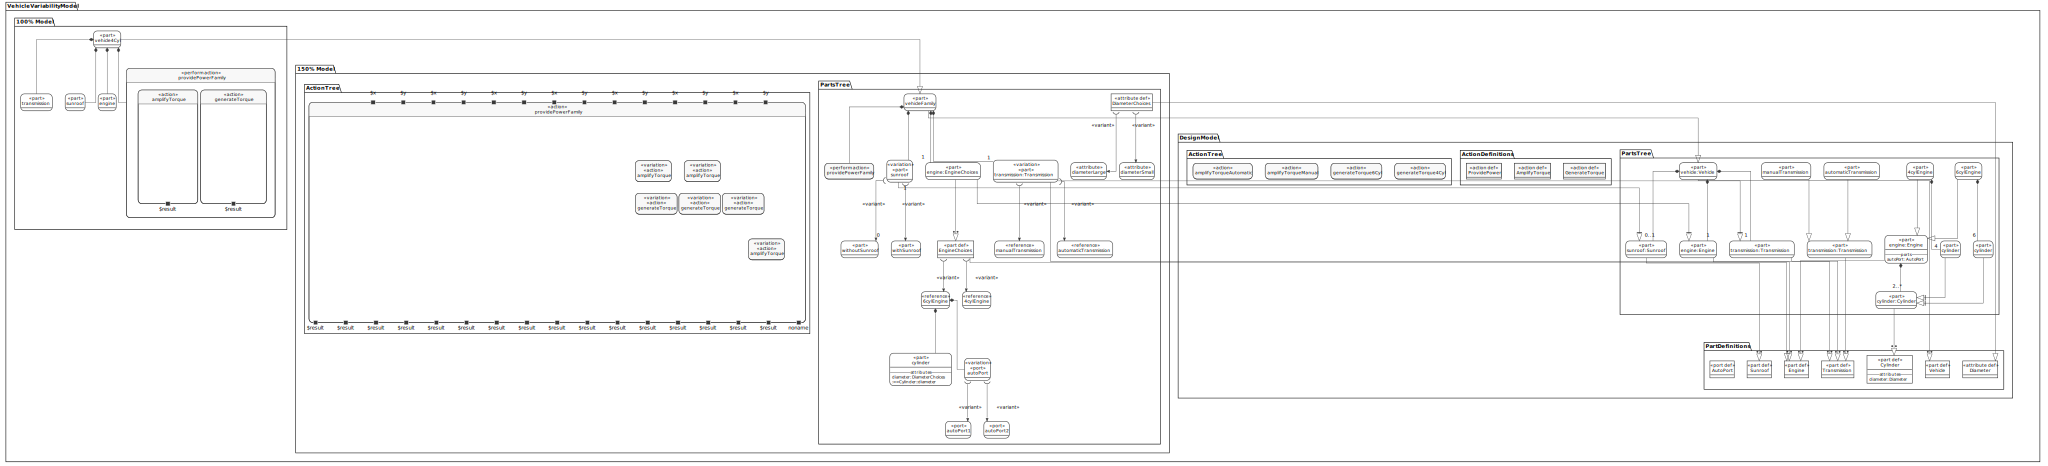

In [57]:
%viz --style="ORTHOLINE" --view="MIXED" "VehicleVariabilityModel"